# 1. Descripción del dataset ¿Por qué es importante y que pregunta/problema pretende responder?

El dataset elegido se corresponde a la [Encuesta de estructura salarial](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177025&menu=resultados&idp=1254735976596#!tabs-1254736195110), hecha por el [Insituto Nacional de Estadística](https://www.ine.es/).

En estas encuestas, encontramos la información (desde 1995) sobre la estructura y distribución de los salarios en España. Es una encuesta que se realiza por los diferentes paises a nivel europeo, y que está regulada de forma común, de forma que investiga en todos los estados miembros los salarios en función de una gran varidad de variables, como el sexo, la ocupación, la rama de la actividad, la antigüedad (o experiencia del trabajador), o el tamaño de la empresa (y muchos más, en total tenemos 56 campos diferentes, tal y como veremos más adelante).

Es una encuesta que se realiza bianualmente, y además, se obtiene de los ficheros de la Seguridad Socila y d ela Agencia Tributaria, además de la utilización de un cuestionario específico.
Podemos consultar muchos más detalles sobre cómo se realiza esta encuesta, en la [web del INE](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177025&menu=ultiDatos&idp=1254735976596).

Existen numerosos datasets que comparan sueldos con otras variables en múltiples páginas de fuentes de datos libres. <br />
Podemos encontrar información parecida en Kaggle  ([Employee Salary Dataset] (https://www.kaggle.com/varungitboi/employee-salary-dataset),  [Kaggle, SF Salaries](https://www.kaggle.com/kaggle/sf-salaries) | [Kaggle, Education, Languages and Salary](https://www.kaggle.com/kailex/education-languages-and-salary) | [Kaggle, Where it Pays to Attend College](https://www.kaggle.com/wsj/college-salaries)) sobre la comparativa de salarios en diferentes paises del mundo, con respecto a la educación recibida por el trabajador, con respecto a los años de experiencia, e incluso según a qué universidad (estadounidense) asistieron. <br />

Pero hemos decidido utilizar un dataset que refleje los datos nuestro pais, por cercanía, por interés personal, por lo completo del mismo (tenemos 56 columnas, comparadas con las 10 o 12 que hemos encontrado en otros parecidos), por la cantidad de datos que tenemos en él (216726 muestras), porque es más fácil sacar conclusiones conociendo nuestro día a día y nuestra cultura, pero sobre todo, porque es un dataset del "mundo real", más complejo sin duda, pero estamos seguros de que su estudio nos enriquecerá a nivel académico y personal. 


Con este dataset, buscamos contestar **preguntas sobre la distribución de salarios en la población española**. <br> 
Nos gustaría estudiar/averiguar si hay una correspondencia clara en cuanto a la experiencia/antigüedad y el salario (¿Son los trabajadores con más experiencia los que más cobran?), ¿cómo se distribuye el sueldo según el sexo? ¿tenemos una brecha de género con respecto al sexo en nuestro país?. Incluso haciendo zoom a nivel de actividad económica, ¿Cuales son las industrias mejores pagadas y las peores? ¿Y cuando al sexo de los trabajadores? ¿Cobran más los trabajadores con más estudios? ¿O es más importante el tipo de responsabilidad que el trabajador tiene en una empresa? ¿Hay diferencias de sueldo entre diferentes regiones del país?

Quedan fuera del ámbito de este estudio las características que son ajenas a la empresa y/o el trabajador como: días de baja, incapacidades, etc. No tendremos en cuenta en qué convenio o sector la seguridad social paga mejor en caso de baja (por ejemplo). 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

plt.style.use('bmh')

Añadimos el siguiente cambio de etilo para poder alinear las tablas a la izquierda.

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

Cargamos nuestro dataset extraido del INE.

In [3]:
dfSueldos = pd.read_csv('./Dataset/EES_2018.csv', delimiter="\t")
dfSueldos.head()

,IDENCCC,ORDENTRA,NUTS1,CNACE,ESTRATO2,CONTROL,MERCADO,REGULACION,SEXO,TIPOPAIS,...,DSIESPA3,SIESPA4,DSIESPA4,RETRINOIN,RETRIIN,GEXTRA,VESPNOIN,VESPIN,ANOS2,FACTOTAL
0,25,1,1,H1,1,2,3,2,1,1,...,0,6,0,6128.65,0.0,787.35,0.0,0.0,6,70.48
1,25,2,1,H1,1,2,3,2,1,1,...,0,6,0,16509.97,0.0,3127.50,0.0,0.0,6,70.48
2,25,3,1,H1,1,2,3,2,6,1,...,0,6,0,18284.40,0.0,3200.76,0.0,0.0,4,70.48
3,25,4,1,H1,1,2,3,2,1,1,...,0,6,0,16549.97,0.0,3127.77,0.0,0.0,6,70.48
4,25,5,1,H1,1,2,3,2,1,1,...,0,6,0,16554.71,0.0,3072.51,0.0,0.0,4,70.48


In [4]:
#mostramos la amplitud del dataset
dfSueldos.shape

(216726, 56)

Vemos que para nuestro estudio tenemos un amplio dataset, formado por 216726 muestras y 56 características.

# 2. Integración y selección de los datos de interés a analizar.


Mostramos a continuación el detalle de todas las caracteríticas incluidas enel dataset. Acompañamos la documentación con el archivo "dr_EES_2018.xlsx" descargado de la página del INE junto al dataset original y que contiene la explicación detallada de cada una de ellas y a que se corresponden los valores categóricos almacenados.

| Variable   | Descripción                                                                        |
|------------|------------------------------------------------------------------------------------|
| IDENCCC    | CÓDIGO DE IDENTIFICACIÓN DEL CENTRO DE COTIZACIÓN                                  |
| ORDENTRA   | NÚMERO DE ORDEN DEL TRABAJADOR                                                     |
| NUTS1      | NUTS1                                                                              |
| CNACE      | CÓDIGO ACTIVIDAD ECONOMICA (CNAE 2009)                                             |
| ESTRATO2   | TAMAÑO DE LA UNIDAD                                                                |
| CONTROL    | PROPIEDAD O CONTROL                                                                |
| MERCADO    | MERCADO                                                                            |
| REGULACION | FORMA DE REGULACIÓN DE LAS RELACIONES LABORALES                                    |
| SEXO       | SEXO                                                                               |
| TIPOPAIS   | NACIONALIDAD                                                                       |
| CNO1       | CODIGO DE OCUPACION (GRUPO PRINCPAL CNO-11)                                        |
| RESPONSA   | RESPONSABILIDAD EN ORGANIZACIÓN Y/O SUPERVISION                                    |
| ESTU       | ESTUDIOS (CODIGO DE LA TITULACION)                                                 |
| ANOANTI    | AÑOS DE ANTIGÜEDAD                                                                 |
| MESANTI    | MESES DE ANTIGÜEDAD                                                                |
| TIPOJOR    | TIPO DE JORNADA                                                                    |
| TIPOCON    | DURACION DEL CONTRATO                                                              |
| FIJODISM   | MESES DEL PERÍODO DE TRABAJO DEL TRABAJADOR FIJO DISCONTINUO                       |
| FIJODISD   | DÍAS DEL PERÍODO DE TRABAJO DEL TRABAJADOR FIJO DISCONTINUO                        |
| VAL        | DIAS DE VACACIONES ANUALES LABORABLES                                              |
| VAN        | DIAS DE VACACIONES ANUALES NATURALES                                               |
| PUENTES    | FIESTAS NO OFICIALES                                                               |
| JAP        | JORNADA ANUAL PACTADA                                                              |
| JSP1       | JORNADA SEMANAL PACTADA  (HORAS)                                                   |
| JSP2       | JORNADA SEMANAL PACTADA  (MINUTOS)                                                 |
| HEXTRA     | HORAS EXTRAORDINARIAS                                                              |
| DRELABM    | DURACIÓN DE LA RELACIÓN LABORAL EN EL MES DE OCTUBRE                               |
| SIESPM1    | SITUACIÓN ESPECIAL 1 EN EL MES DE OCTUBRE                                          |
| DSIESPM1   | DÍAS EN SITUACIÓN ESPECIAL 1 EN EL MES DE OCTUBRE                                  |
| SIESPM2    | SITUACIÓN ESPECIAL 2 EN EL MES DE OCTUBRE                                          |
| DSIESPM2   | DÍAS EN SITUACIÓN ESPECIAL 2 EN EL MES DE OCTUBRE                                  |
| SALBASE    | SALARIO BASE                                                                       |
| EXTRAORM   | PAGA EXTRAORDINARIA MENSUAL                                                        |
| PHEXTRA    | PAGOS POR HORAS EXTRAORDINARIAS                                                    |
| COMSAL     | COMPLEMENTOS SALARIALES                                                            |
| COMSALTT   | COMPLEMENTOS SALARIALES POR TURNO DE TRABAJO                                       |
| IRPFMES    | RETENCIONES IRPF EN EL MES DE OCTUBRE                                              |
| COTIZA     | CONTRIBUCIONES A LA SEGURIDAD SOCIAL                                               |
| BASE       | BASE DE COTIZACIÓN  A LA SEGURIDAD SOCIAL POR CONTINGENCIAS COMUNES DEL TRABAJADOR |
| DRELABAM   | DURACIÓN DE LA RELACIÓN LABORAL EN EL AÑO (MESES)                                  |
| DRELABAD   | DURACIÓN DE LA RELACIÓN LABORAL EN EL AÑO (DÍAS)                                   |
| SIESPA1    | SITUACIÓN ESPECIAL 1 EN EL AÑO                                                     |
| DSIESPA1   | DÍAS EN SITUACIÓN ESPECIAL 1 EN AÑO                                                |
| SIESPA2    | SITUACIÓN ESPECIAL 2 EN EL AÑO                                                     |
| DSIESPA2   | DÍAS EN SITUACIÓN ESPECIAL 2 EN AÑO                                                |
| SIESPA3    | SITUACIÓN ESPECIAL 3 EN EL AÑO                                                     |
| DSIESPA3   | DÍAS EN SITUACIÓN ESPECIAL 3 EN AÑO                                                |
| SIESPA4    | SITUACIÓN ESPECIAL 4 EN EL AÑO                                                     |
| DSIESPA4   | DÍAS EN SITUACIÓN ESPECIAL 4 EN AÑO                                                |
| RETRINOIN  | SALARIO BRUTO ANUAL NO DERIVADO DE IT                                              |
| RETRIIN    | SALARIO BRUTO ANUAL DERIVADO DE IT                                                 |
| GEXTRA     | GRATIFICACIONES EXTRAORDINARIAS ABONADAS EN EL AÑO                                 |
| VESPNOIN   | VALORACIÓN EN ESPECIE NO DERIVADA DE IT                                            |
| VESPIN     | VALORACIÓN EN ESPECIE DERIVADA DE IT                                               |
| ANOS2      | EDAD                                                                               |
| FACTOTAL   | FACTOR DE ELEVACIÓN (12.2)                                                         |

In [5]:
#vemos información de las diferentes variables.

dfSueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216726 entries, 0 to 216725
Data columns (total 56 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDENCCC     216726 non-null  int64  
 1   ORDENTRA    216726 non-null  int64  
 2   NUTS1       216726 non-null  int64  
 3   CNACE       216726 non-null  object 
 4   ESTRATO2    216726 non-null  int64  
 5   CONTROL     216726 non-null  int64  
 6   MERCADO     216726 non-null  int64  
 7   REGULACION  216726 non-null  int64  
 8   SEXO        216726 non-null  int64  
 9   TIPOPAIS    216726 non-null  int64  
 10  CNO1        216726 non-null  object 
 11  RESPONSA    216726 non-null  int64  
 12  ESTU        216726 non-null  int64  
 13  ANOANTI     216726 non-null  int64  
 14  MESANTI     216726 non-null  int64  
 15  TIPOJOR     216726 non-null  int64  
 16  TIPOCON     216726 non-null  int64  
 17  FIJODISM    216726 non-null  int64  
 18  FIJODISD    216726 non-null  int64  
 19  VA

In [6]:
# Echamos un vistazo a los valores únicos existentes en cada variable

dfSueldos.nunique(axis=0)


IDENCCC        24710
ORDENTRA          50
NUTS1              7
CNACE             27
ESTRATO2           5
CONTROL            2
MERCADO            4
REGULACION         5
SEXO               2
TIPOPAIS           2
CNO1              17
RESPONSA           2
ESTU               7
ANOANTI           53
MESANTI           13
TIPOJOR            2
TIPOCON            2
FIJODISM          11
FIJODISD          30
VAL               65
VAN               76
PUENTES           41
JAP             1824
JSP1              54
JSP2              60
HEXTRA           101
DRELABM           28
SIESPM1            2
DSIESPM1          32
SIESPM2            2
DSIESPM2          19
SALBASE        90367
EXTRAORM        6006
PHEXTRA         7292
COMSAL         97788
COMSALTT       18103
IRPFMES        78825
COTIZA         23862
BASE          124533
DRELABAM          12
DRELABAD          32
SIESPA1            2
DSIESPA1         366
SIESPA2            2
DSIESPA2         291
SIESPA3            2
DSIESPA3         346
SIESPA4      


Vamos a fijarnos en algunas de las columnas, empezando por NUTS1 que se refiere a la región donde residen las personas del estudio.

Vemos los  códigos de las regiones utilizadas

| Código | Descripción         |
|--------|---------------------|
| 1      | NOROESTE            |
| 2      | NORESTE             |
| 3      | COMUNIDAD DE MADRID |
| 4      | CENTRO              |
| 5      | ESTE                |
| 6      | SUR                 |
| 7      | CANARIAS            |

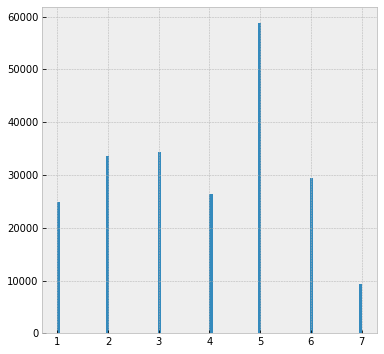

In [7]:
#Siete regiones
columnName = 'NUTS1'

dfSueldos[columnName].hist(figsize=(6,6), bins=100)


Vamos a centrarnos en la variable sexo.

| Código | Descripción |
|--------|-------------|
| 1      | HOMBRE      |
| 6      | MUJER       |

In [8]:
dfSueldos['SEXO'].value_counts()


1    122558
6     94168
Name: SEXO, dtype: int64

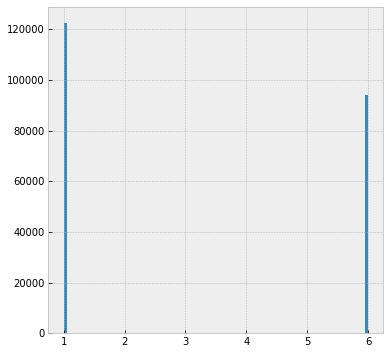

In [9]:
columnName = 'SEXO'

dfSueldos[columnName].hist(figsize=(6,6), bins=100)

# 3. Limpieza de los datos.

### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?


In [10]:
#comprobamos cuales son las que tienen menos datos.

df2 = dfSueldos[[column for column in dfSueldos if dfSueldos[column].count() / len(dfSueldos) <= 0.3]]
df2.columns

Index([], dtype='object')

Por lo que podemos ver los datos están completos y no encontramos variables con pocos datas registrados.


No hay columnas a las que les falten datos.

No es necesario imputar los datos que faltan.

No hay valores nulos en ninguno de los atributos.

Nota: A veces se utilizan ceros para indicar la ausencia de ciertos valores, sin embargo en el análisis de los datos, los campos y sus dominios, hemos visto que las columnas que tienen ceros, pertececen al dominio y tiene un significado: por ejemplo, en el campo ESTRATO2, el 0 significa "todos los estratos".

count    216726.000000
mean       1401.945641
std        1359.783859
min           0.000000
25%         900.000000
50%        1174.285000
75%        1602.175000
max      166084.020000
Name: SALBASE, dtype: float64


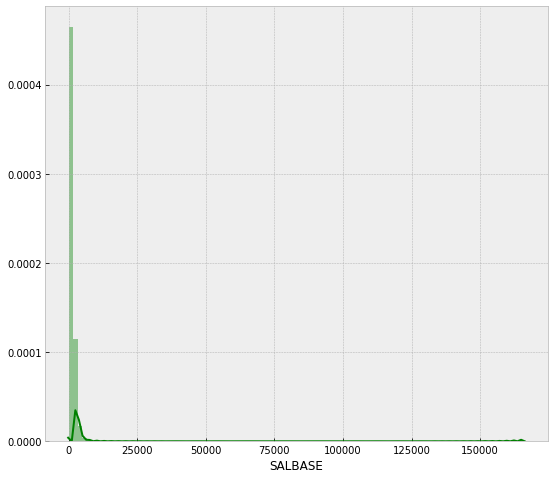

In [11]:
#realizamos un estudio de nuestra variable objetivo

columnName = 'SALBASE'

print(dfSueldos[columnName].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=100, hist_kws={'alpha': 0.4});

(array([0]), <a list of 1 Text xticklabel objects>)

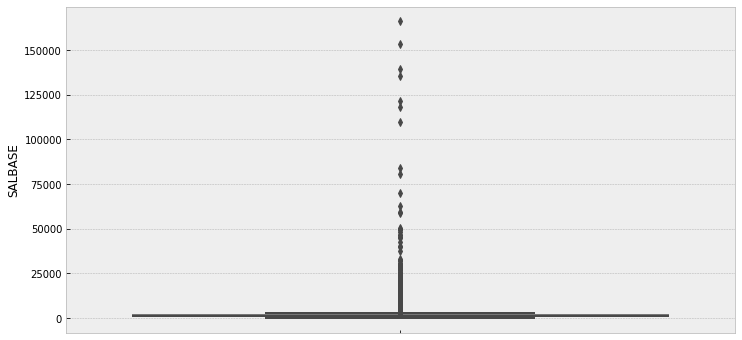

In [12]:
#vamos a ver la distibución de los datos de Salario base
plt.figure(figsize = (12, 6))
ax = sns.boxplot(y='SALBASE',  data=dfSueldos)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [13]:
# Vemos que hay muchos valores por encima del limite superior de la distribución de salarios
# lo que provoca dificultades en la visualización.
# Vamos a eliminar algunos de los registros para visualizar mejor la distrubución de los datos
# luego resolveremos si debemos considerar estos datos como outliers

#en primer lugar calcularemos los percentiles de la distribución de los valores de SALBASE
arr = dfSueldos[columnName]

print("percentil 5 : ",
       np.percentile(arr, 5))

print("percentil 50 : ", 
       np.percentile(arr, 50))

print("percentil 95 : ",
       np.percentile(arr, 95))



percentil 5 :  427.94
percentil 50 :  1174.2849999999999
percentil 95 :  3013.265


### 3.2. Identificación y tratamiento de valores extremos.

In [14]:
#Eliminaremos los outliers (valores que se alejan tres veces la desviación estándar)

# Para el salario: 

mean= dfSueldos['SALBASE'].mean()
std= dfSueldos['SALBASE'].std()
limit = mean + 3*std

dfSueldos[(dfSueldos.SALBASE > limit)]
#Hay 1668 personas cuyo sueldo es un valor extremo

#Eliminamos estos Outliers:
dfSueldos = dfSueldos[(dfSueldos.SALBASE < limit)]



(array([0]), <a list of 1 Text xticklabel objects>)

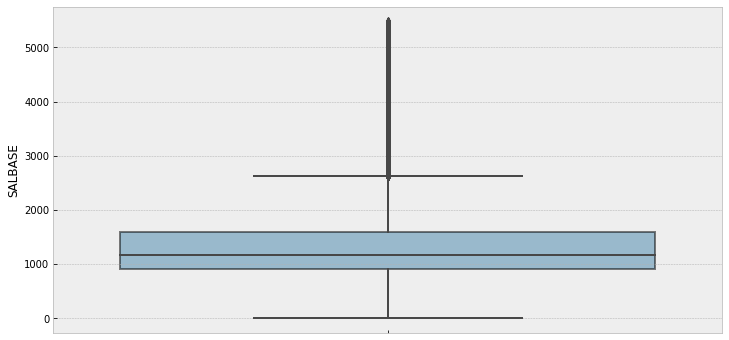

In [15]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(y='SALBASE',  data=dfSueldos)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

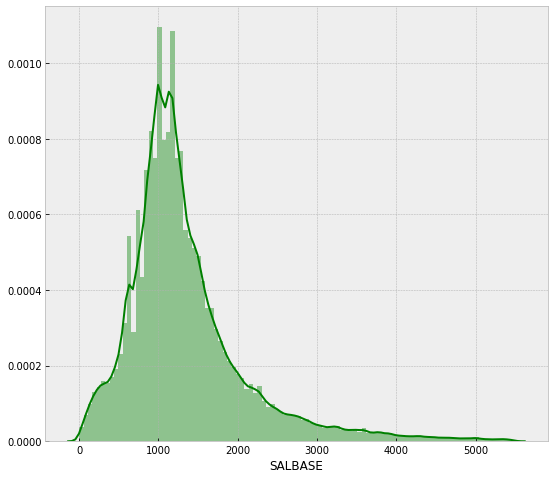

In [16]:
#Visualizamos mejor la distribución del Salario base

columnName = 'SALBASE'

plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=True);

In [17]:

df_num = dfSueldos.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,IDENCCC,ORDENTRA,NUTS1,ESTRATO2,CONTROL,MERCADO,REGULACION,SEXO,TIPOPAIS,RESPONSA,...,DSIESPA3,SIESPA4,DSIESPA4,RETRINOIN,RETRIIN,GEXTRA,VESPNOIN,VESPIN,ANOS2,FACTOTAL
0,25,1,1,1,2,3,2,1,1,0,...,0,6,0,6128.65,0.0,787.35,0.0,0.0,6,70.48
1,25,2,1,1,2,3,2,1,1,0,...,0,6,0,16509.97,0.0,3127.50,0.0,0.0,6,70.48
2,25,3,1,1,2,3,2,6,1,0,...,0,6,0,18284.40,0.0,3200.76,0.0,0.0,4,70.48
3,25,4,1,1,2,3,2,1,1,0,...,0,6,0,16549.97,0.0,3127.77,0.0,0.0,6,70.48
4,25,5,1,1,2,3,2,1,1,0,...,0,6,0,16554.71,0.0,3072.51,0.0,0.0,4,70.48


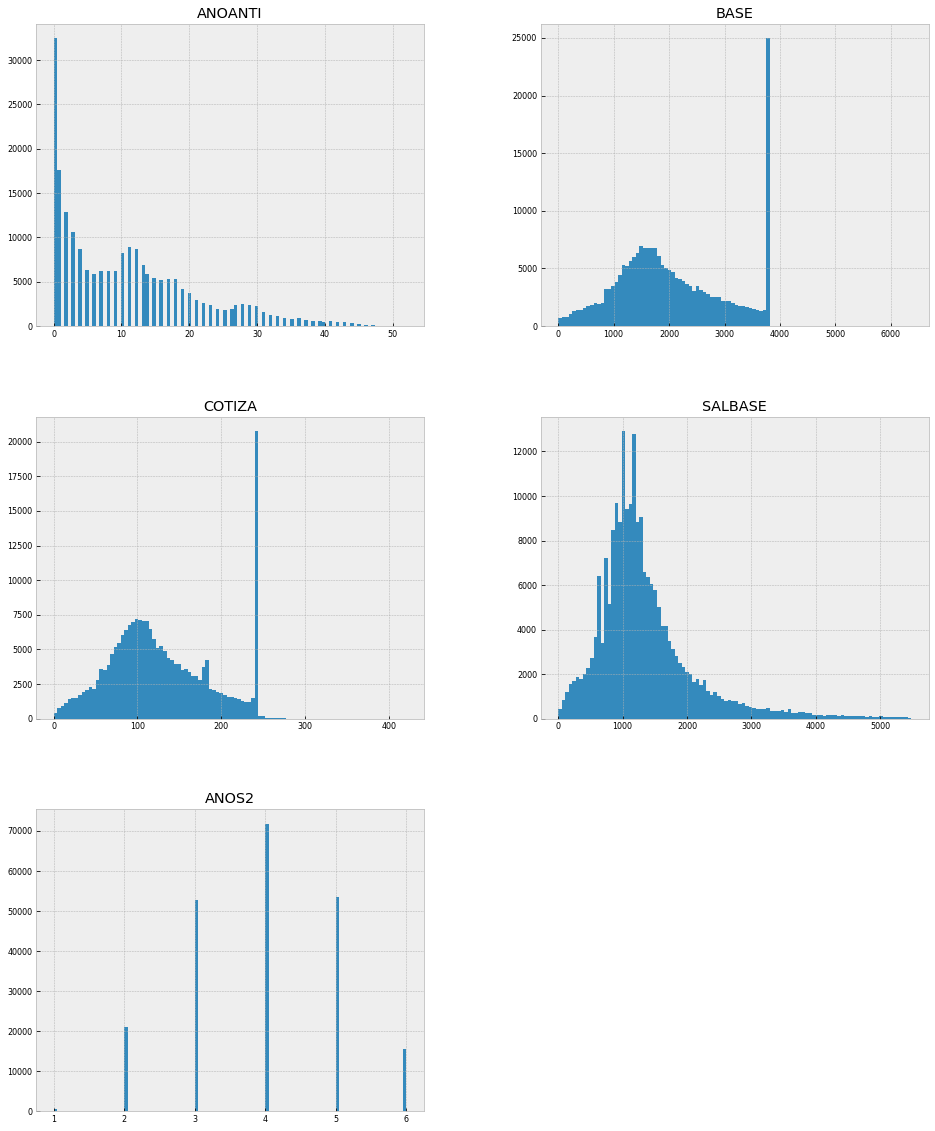

In [18]:
numericColums = ['ANOANTI','BASE','COTIZA','SALBASE', 'ANOS2']

dfSueldos.hist(figsize=(16,20), bins=100, xlabelsize=8, ylabelsize=8,column=numericColums);

La base de cotización máxima para la seguridad social en España, en 2018, era de 3751€. Por eso, aunque quitemos los outliers de salario, todas las personas de la muestra que cobren más de esa cantidad, como no pagan más de base, aparecen en esa columna en el histograma. 

De igual forma ocurre con la característca que indica las contribuciones a la seguridad social, que son un porcentaje fijo de esa base de contización que hemos visto. Así que exatamente la misma columna aparece en esta gráfica, ya que es una variable totalmente dependiente. 


In [19]:
dfSueldos_corr = dfSueldos.corr()['SALBASE'] 
#golden_features_list = dfSueldos_corr[abs(dfSueldosd_corr) > 0.5].sort_values(ascending=False)
golden_features_list = dfSueldos_corr.sort_values(ascending=False)


print("Mostramos la correlación de las variables:")
print(golden_features_list[1:])

Mostramos la correlación de las variables:
COTIZA        0.682759
BASE          0.665110
RETRINOIN     0.510249
IRPFMES       0.491566
JSP1          0.399297
JAP           0.373218
ESTU          0.350257
RESPONSA      0.256395
MERCADO       0.217328
GEXTRA        0.216637
VAL           0.203136
ANOANTI       0.180501
RETRIIN       0.154888
DRELABAM      0.140991
VESPNOIN      0.134489
DSIESPM1      0.128118
ESTRATO2      0.092321
PUENTES       0.072012
DSIESPA1      0.069142
COMSAL        0.064092
ORDENTRA      0.063910
ANOS2         0.049008
SIESPA3       0.045717
EXTRAORM      0.042577
DSIESPA2      0.031286
DRELABM       0.022723
REGULACION    0.022318
MESANTI       0.022254
COMSALTT      0.019564
VESPIN        0.017308
CONTROL       0.013837
JSP2          0.008450
PHEXTRA       0.000273
DSIESPA4     -0.000563
IDENCCC      -0.001050
DSIESPM2     -0.001874
SIESPM2      -0.007484
HEXTRA       -0.023563
SIESPA4      -0.029745
TIPOPAIS     -0.033520
DSIESPA3     -0.049702
SIESPA2      -

Hay variables que evidentemente tienen mucha correlación con el sueldo, básicamente porque son un cálculo de este. Aunque no sean 100% dependientes ya que la normativa española tiene excepciones, es obvio que la base de cotización, el IRPF, la cantidad aportada la seguridad social, el salario bruto anual, etc muestran mucha correlación. 

En realidad no es que con estas variables podamos "predecir" el salario, es que estas variables se extraen del salario a través de cálculos (combinando con otros factores).

Por tanto, a la hora de elegir variables que nos ayuden a hacer una predicción, podemos apoyarnos en variables como "jornada semanal pactada" (es de sentido común que si trabajas más horas a la semana, cobrarás más que si tienes un trabajo de media joranada). También dejamos variables como responsabilidad y estudios, porque queremos estudiar cuánto influye el nivel de estudios o la responsabilidad de una persona en el salario final. 

Pero debemos eliminar variables que son un cálculo directo del salario: base, cotización, sueldo bruto, IRPF, etc... 

El siguiente apartado es donde realizamos la selección de los datos de interés.

## Integración y selección de los datos de interés a analizar.

Hay determinados campos que no son de interés para el estudio que se quiere realizar:

Quitamos: 
- IDENCCC (0): Este código de identificación del centro de cotización no nos permite identificar ninguna información relevante sobre el trabajador. 
- ORDENTRA (1): No es
- RESPONSA (11): Porque con el campo código de ocupación tenemos información más precisa de la responsabilidad del trabajador en su empresa. 
- FIJODISM (17), FIJODISD (18): El hecho de que sean fijos discontinuos no aportan más información que el número de días (jornada anual pactada) que trabaja. 
- VAL (19), VAN (20), PUENTES (21): Las vacaciones pagadas son beneficios que aporta la empresa que no están relacionados con el salario.

- (Campos calculados) IRPFMES (36), COTIZA (37), BASE (38), RETRINOIN : Los impuestos que cada persona paga dependen de su salario, combinados con sus circunstancias personales. Toda la información necesaria para nuestro estudio lo obtendremos del salario, no de su IRPF/cotizaciones. RETRINOIN es un cálculo a partir del salario (o al revés). 

- No consideraremos los días en situaciones especiales, ya que se podrían considerar outliers. Situaciones especiales, o extraordinarias, no son la norma y son ruido en nuestra muestra. SIESPM1, DSIESPM1, SIESPM2, DSIESPM2 SIESPA1, DSIESPA1, SIESPA2, DSIESPA2 SIESPA3, DSIESPA3, SIESPA4, DSIESPA4. Tampoco son campos que el trabajador "elija": si hay una incapacidad, una baja o algo así es un imprevisto contral el que no podemos hacer nada.
- RETRIIN: Queda fuera del ámbito del estudio los salarios brutos derivados de las incapacidades temporales.
- FACTOTAL: Es una variable estadística que no aporta nada en nuestro estudio.

In [20]:
dfSueldos = dfSueldos.drop(["IDENCCC", "ORDENTRA", "RESPONSA", "FIJODISM", "FIJODISD", "VAL", "VAN", "PUENTES", "IRPFMES" , "COTIZA", "BASE", 
## Integración y selección de los datos de interés a analizar.
"SIESPM1", "DSIESPM1", "SIESPM2", "DSIESPM2", "SIESPA1", "DSIESPA1", "SIESPA2", "DSIESPA2", "SIESPA3", "DSIESPA3", "SIESPA4", "DSIESPA4", "RETRINOIN", "RETRIIN", "FACTOTAL"], axis=1)

## COLUMNAS CALCULADAS

Cálculo de columnas

- Meses de antigüedad (tenemos dos campos para la antigüedad/experiencia-cotizado, años y meses, vamos a simplicarlo dejando sólo uno)
- Precio/hora (simplificamos el dataset, en lugar de considerar jornadas semanales pactadas y salario, unificamos el precio hora)
- Unificar Jornada semanal pactada (a horas)

- Salario: simplificamos salario, pagas extras, y decidiremos qué complementos consideramos "salario" y cuáles no. (por ejemplo: la cesta de navidad es un beneficio/complemento, pero ... ¿debería ser considerado salario para nuestro estudio?)




**Cálculo** Tenemos una columna "años de antiguedad" y otra "meses de antiguedad". Vamos a pasarlo todo a meses, lo guardamos en la columna 'MESANTI'  y borramos la columna años.

In [21]:
dfSueldos['MESANTI']  = dfSueldos['MESANTI'] + dfSueldos['ANOANTI'] * 12
dfSueldos = dfSueldos.drop(["ANOANTI"], axis=1)

Cálculo Tenemos una columna "JORNADA SEMANAL PACTADA (HORAS)" y otra para los minutos. Vamos a pasarlo todo a horas, lo guardamos en la columna JSP1 y borramos la columna de minutos.

In [22]:
dfSueldos['JSP1'] = dfSueldos['JSP1'] +dfSueldos['JSP2']/60
dfSueldos = dfSueldos.drop(["JSP2"], axis=1)

Estudio de las columnas asociadas a salario y complementos:

In [23]:
print("Salario base")
print(dfSueldos['SALBASE'].describe(), "\n") 

print("Paga extra")
print(dfSueldos['EXTRAORM'].describe(), "\n") 

print("Pago por horas extras")
print(dfSueldos['PHEXTRA'].describe(),"\n"   )

print("Complementos salariales")
print(dfSueldos['COMSAL'].describe(),"\n") 

print("COMPLEMENTOS SALARIALES POR TURNO DE TRABAJO")
print(dfSueldos['COMSALTT'].describe())

Salario base
count    215058.000000
mean       1342.060956
std         763.257873
min           0.000000
25%         897.555000
50%        1169.090000
75%        1586.210000
max        5481.180000
Name: SALBASE, dtype: float64 

Paga extra
count    215058.000000
mean         45.956117
std         353.679755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       54693.930000
Name: EXTRAORM, dtype: float64 

Pago por horas extras
count    215058.000000
mean         10.617753
std          84.837671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       11556.810000
Name: PHEXTRA, dtype: float64 

Complementos salariales
count    215058.000000
mean        629.140661
std        1082.113730
min           0.000000
25%          24.150000
50%         294.965000
75%         849.737500
max       83468.990000
Name: COMSAL, dtype: float64 

COMPLEMENTOS SALARIALES POR TURNO DE TRABAJO
count    215058.00000

**Propuesta:**

Sumamos el salario base + paga extra, para igualar las personas con 14 pagas o 12.

NO Añadimos los complementos salariales, ni valoaciones en especie, que forman parte del salario (coche, tickets restaurant, plan de pensiones, etc... ), porque aunque se pueda pagar IRPF por eso, no es dinero "líquido" o "neto" que estamos recibiendo en la nómina. Ni tampoco los complementos salariales por turno de trabajo.(borramos las columnas)

NO añadimos el pago por horas extras, ya que el cálculo lo haremos con la "jornada semanal pactada" - para ver cuando cobran la hora. Si añadimos las horas extras, estamos "ruido" en el cálculo. Además, las horas extras no las cobra todo el mundo, no es un complemento en el sueldo estable, y lo mismo pasa con las gratificaciones extraordinarias (borramos la columna)

In [24]:
dfSueldos['SALARIO'] = dfSueldos['SALBASE']+dfSueldos['EXTRAORM']

Quitamos los outliers de "salario". Estos datos desvirtuan el estudio.

In [25]:
# Quitar outliers de salario


# Para el salario: 

mean= dfSueldos['SALARIO'].mean()
std= dfSueldos['SALARIO'].std()
limit = mean + 3*std

dfSueldos[(dfSueldos.SALARIO > limit)]
#Hay 4095  personas cuyo sueldo es un valor extremo

#Eliminamos estos Outliers:
dfSueldos = dfSueldos[(dfSueldos.SALARIO < limit)]

In [26]:
# En realidad para calcular el precio /hora que cobran los trabajadores, las columnas que nos interesan son el salario y la duración de la jornada laboral semanal pactada. 
# vamos a obviar el dato de cúantos meses/días trabajan al año. 
# Borramos las columnas DRELABAM y  DRELABAD

dfSueldos = dfSueldos.drop(["DRELABAM", "DRELABAD" ], axis=1)

# variables, bonos, y extras no "estables" también las desechamos para el estudio.
# aunque estas columnas sí dependan del trabajador, no es algo que tienen todas las empresas.
# igual que las valoraciones en especie.

dfSueldos = dfSueldos.drop(["GEXTRA", "VESPNOIN", "VESPIN" ], axis=1)

**Cálculo del precio/hora:**

horas trabajadas al mes = (jornada semanal pactada en horas *4) salario / horas trabajadas al mes

In [27]:
dfSueldos['PRECIOHORA'] = dfSueldos['SALARIO'] / (dfSueldos['JSP1']*4)

Después de esta limpieza, volvamos a mirar las variables/correlación.

In [28]:
#Quito las columnas calculadas, o que dependen del salario y que no ayudarán a hacer la predicción. 
dfSueldosReduced = dfSueldos.drop(["SALARIO", "SALBASE"], axis=1)


In [29]:
dfSueldos_corr = dfSueldosReduced.corr()['PRECIOHORA'] 
#golden_features_list = dfSueldos_corr[abs(dfSueldosd_corr) > 0.5].sort_values(ascending=False)
golden_features_list = dfSueldos_corr.sort_values(ascending=False)
print("Mostramos la correlación de las variables:")
print(golden_features_list[1:])

Mostramos la correlación de las variables:
ESTU          0.297295
EXTRAORM      0.254397
MESANTI       0.180802
MERCADO       0.147426
ESTRATO2      0.085332
ANOS2         0.072171
DRELABM       0.019568
COMSAL        0.009294
COMSALTT      0.008489
REGULACION    0.007734
CONTROL       0.003143
PHEXTRA      -0.011482
HEXTRA       -0.034622
TIPOPAIS     -0.038410
TIPOJOR      -0.042955
JSP1         -0.046968
NUTS1        -0.051016
JAP          -0.055524
SEXO         -0.073423
TIPOCON      -0.080352
Name: PRECIOHORA, dtype: float64


Por una parte, teniendo en cuenta que tenemos variables que son categóricas, por ejemplo el nivel de estudios, no podemos esperar una correlación muy alta, ya que el nivel de estudio están enumerado del 1 al 7, siendo 1 menos que estudios básicos obligatorios, y 7 unos estudios de alto nivel: licenciados y doctorados. <br>
Pero aunque sea una variable categórica, estamos dandole un número al nivel de estudios. <br>
El hecho de que salga que la variable con más correlación del dataset es el nivel de estudios del trabajador nos parece significativo y coherente.

Después la experiencia del trabajador (en meses) y un poco menos la la edad (aunque la experiencia y la edad suelen ir relacionadas).
De las variables que aparecen con cierta correlación son: el tipo de contrato (los trabajadores indefinidos cobran un poco más), el sexo también parece influir (el general, las mujeres cobran menos), o la región de la empresa (tal y como está el código numérico: cuanto más al sur esté la región, menos sueldo se percibe).

Otras variables que "pertenecen a la empresa" y que influyen: los saldos son más altos en empresas más grandes, con mercados mayores (mejor pagados los trabajadores de empresas internacionales, que los de comercio local).
Pero por ejemplo, no parece que afecte si el control de la empresa es público o privado. 



# 4. Análisis de los datos.


## 4.1 Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).

Del dataset nos interesa hacer diferentes análisis en función de diferentes subconjuntos de datos:

- Edad (ANOS2)
- Experiencia (ANOANTI)
- Sexo (SEXO)
- Industria/tipo de actividad (CNACE)
- Españoles o migrantes (TIPOPAIS)
- Estudios (ESTU)
- Código de ocupación.
- Región (NUTS1)

¿Son los trabajadores con más años y/o experiencia los que más cobran?<br>
¿Cobran menos las mujeres? (hablemos de precio/hora aquí, porque estadísticamente hay muchas mujeres con jornada reducida)  <br>
¿Cobran menos las mujeres en el mismo tipo de trabajo que los hombres?<br>
¿Cual es la industria mejor pagada?¿Y la peor?<br>
¿Hay diferencia de salarios de personas con nacionalidad española, de los que no la tienen?<br>
¿Cobran más los trabajadores con más estudios?<br>
¿Cobran más los trabajadores con mayor responsabilidad /código de ocupación?<br>
¿Cuál es la región en la que más se cobra?¿Y en la que menos?<br>

## 4.2 Comprobación de la normalidad y homogeneidad de la varianza.

Veamos la distrubición de la varianza en las siguientes variables numéricas: <br>
Aunque tengamos algunas variables cualitativas cuyo código es numérico, y por ejemplo, en el análisis hemos podido sacar algunas conclusiones, como no hablamos de variables contínuas, no las incluyo en este apartado.

- Meses de antigüedad (-> MESANTI)
- Jornada semanal (en horas) (-> JSP1)
- Precio /hora (-> PRECIOHORA)
- Salario  (-> SALARIO)

Como hemos visto en teoría, las pruebas para la comprobación de la normalidad más habituales son Shapiro-Wilk y Kolmogorov-Smirnov.

Existe también otra prueba llamada de "Anderson-Darling" que comprueba si sigue otra distribución particular (no sólo la normal), como exponencia, logística o Gumbel.

En ellas asumiremos como hipótesis nula que la población sigue una distribución normal. <br> 
Después de aplicar estas pruebas, si el pvalor obtenido es inferior al nivel de significancia (normalmente α = 0,05) entonces se rechaza la hipótesis nula (y por tanto se concluye que los datos no vienen de una distribución normal). <br> En cambio, si el p-valor es superior al nivel de significancia, entonces no se puede rechazar la hipótesis nula y se asume que los datos siguen una distribución normal.<br> 

Para aplciar estas pruebas en python hemos recurrido a la siguiente documentación:<br> 

Test de Shapiro-wilk<br> 
ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html<br> <br> 

Test de Anderson-Darling<br> 
ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html<br> <br> 

Test de Kolmogorov-Smirnov<br> 
ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.htm<br> 



In [30]:
from scipy import stats

In [31]:
varcontinuas = dfSueldos[['MESANTI', 'JSP1', 'PRECIOHORA', 'SALARIO']]
varcontinuas

,MESANTI,JSP1,PRECIOHORA,SALARIO
0,346,20.0,4.151125,332.09
1,122,40.0,8.302062,1328.33
2,49,40.0,8.335625,1333.70
3,179,40.0,8.302062,1328.33
4,76,40.0,8.248625,1319.78
...,...,...,...,...
216721,192,18.0,6.494306,467.59
216722,288,37.5,6.494267,974.14
216723,252,37.5,6.030467,904.57
216724,252,37.5,6.030467,904.57


In [32]:
for column in varcontinuas:

    # Test de Shapiro-Wilk
    shapiro_test = stats.shapiro(dfSueldos[column] )
    print(column,": " , shapiro_test)

    # Test de Anderson-Darling
    anderson_test = stats.anderson(dfSueldos[column], dist='norm')
    print(column,": " , anderson_test)

    # Test Kolmogorov-Smirnov
    kolmo_test = stats.kstest(dfSueldos[column], 'norm')
    print(column,": " , kolmo_test)

    print("\n")

MESANTI :  (0.8888380527496338, 0.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


MESANTI :  AndersonResult(statistic=6550.9104059937235, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
MESANTI :  KstestResult(statistic=0.9661467720005557, pvalue=0.0)


JSP1 :  (0.5738488435745239, 0.0)
JSP1 :  AndersonResult(statistic=37188.029671572905, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
JSP1 :  KstestResult(statistic=0.9948579678026631, pvalue=0.0)


PRECIOHORA :  (0.757660984992981, 0.0)
PRECIOHORA :  AndersonResult(statistic=9971.082675367012, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
PRECIOHORA :  KstestResult(statistic=0.9957514630494201, pvalue=0.0)


SALARIO :  (0.9199879765510559, 0.0)
SALARIO :  AndersonResult(statistic=4827.977608444839, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5, 

El test de **Shapiro-Wilk**, comprueba la hipótesis nula que los datos dados siguen una distribución normal. Para que la hipótesis no sea rechazada, p-value debe tener un valor mayor a 0.05. <br>
En el caso del test de **Anderson-Darling**: buscamos que los "critial_values" sean mayores que los valores que da el array "significance_level", para que se cumpla la hipótesis nula. <br>
El test de **Kolmogorov-Smirnov**, cuando le damos sólo una distribución, compara este conjunto con otra distribución normal aleatoria. El valor de pvalue debe ser mayor a 0.05 para "no rechazarse" la hipótesis nula (es decir, que la muestra dada siga una distribución normal).<br>

Con estos resultados se pude decir que ninguna de las 3 variables sigue una distribución normal, en todos los casos el p-value ha sido inferior a 0.05 y por tanto se han rechazado en los tres test la hipótesis nula.


Veamos gráficamente la distribución de cada una de las variables, a través de su histograma y de su curva de densidad.

count    210963.000000
mean        130.807715
std         121.455341
min           1.000000
25%          25.000000
50%         106.000000
75%         198.000000
max         632.000000
Name: MESANTI, dtype: float64


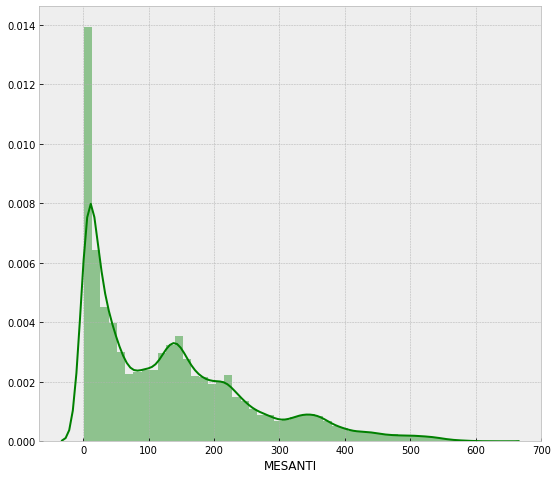

In [33]:
columnName = 'MESANTI'
print(dfSueldos[columnName].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=50, hist_kws={'alpha': 0.4});

count    210963.000000
mean         35.930073
std           8.207350
min           0.250000
25%          37.500000
50%          40.000000
75%          40.000000
max          72.000000
Name: JSP1, dtype: float64


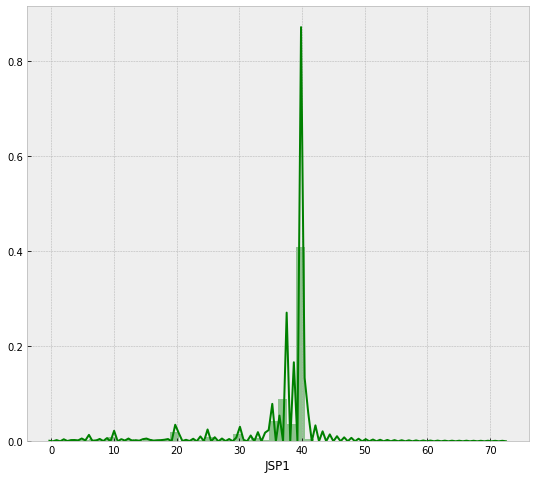

In [34]:
columnName = 'JSP1'
print(dfSueldos[columnName].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=50, hist_kws={'alpha': 0.4});

Legalmente el número máximo de horas (incluyendo las extra) que se pueden hacer a las semana son 80. Encontramos un máximo de 72 horas.  <br>
Como era de esperar, la gran mayoría de los trabajadores tienen una jornada de 40 horas a la semana. Aunque encontramos casi un 10% en 35 horas, y también algunos (pero menos del 5%) en la media jornada (20 horas/semanales.) <br>

Pero efectivamente, tal y como afirmaban los test anteriores, ninguna sigue una distribución normal.

count    210963.000000
mean          9.238699
std           4.697819
min           0.000000
25%           6.416563
50%           7.929038
75%          10.693812
max         362.962500
Name: PRECIOHORA, dtype: float64


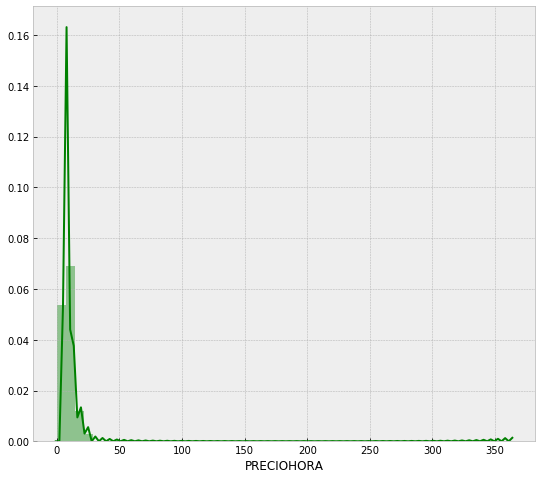

In [35]:
columnName = 'PRECIOHORA'
print(dfSueldos[columnName].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=50, hist_kws={'alpha': 0.4});

Los outilers en este caso desvirtuan la gráfica muchísimo. <br>
Tenemos una varianza de 4.69, una media de 9.27 y un percentil 75% de 10 €/h.<br>
Sin embargo el máximo lo encontramos en 350€/h.<br>
En vista a esta gráfica, también vamos a quitar los outliers a esta columna, porque no es significativa los trabajadores que cobran tantísimo la hora. <br>


In [36]:
# Quitar outliers de precio/hora.


mean= dfSueldos['PRECIOHORA'].mean()
std= dfSueldos['PRECIOHORA'].std()
limit = mean + 3*std


print(limit)
dfSueldos[(dfSueldos.PRECIOHORA > limit)]
#Hay 2971 personas cuyo precio hora está por encima de limite que hemos establecido (23€/h)


23.33215531060908


,NUTS1,CNACE,ESTRATO2,CONTROL,MERCADO,REGULACION,SEXO,TIPOPAIS,CNO1,ESTU,...,HEXTRA,DRELABM,SALBASE,EXTRAORM,PHEXTRA,COMSAL,COMSALTT,ANOS2,SALARIO,PRECIOHORA
173,1,C8,1,2,4,3,1,1,A0,7,...,0,31,3856.92,0.0,0.0,0.00,0.00,4,3856.92,24.105750
225,1,K0,3,2,2,1,1,1,E0,7,...,0,31,3865.61,0.0,0.0,912.58,0.00,4,3865.61,25.431645
239,1,K0,3,2,2,1,6,1,C0,7,...,0,31,3879.14,0.0,0.0,721.70,109.79,4,3879.14,25.520658
240,1,K0,3,2,2,1,1,1,C0,7,...,0,31,3896.53,0.0,0.0,739.00,109.79,4,3896.53,25.635066
277,1,H1,1,2,2,3,1,1,D0,6,...,0,31,3167.46,0.0,0.0,16410.54,0.00,5,3167.46,26.395500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216340,7,G1,1,2,1,5,1,1,E0,5,...,0,31,568.79,0.0,0.0,32.58,0.00,4,568.79,28.439500
216376,7,M0,4,2,2,5,6,1,C0,7,...,0,31,3785.71,0.0,0.0,0.00,0.00,4,3785.71,23.660688
216442,7,N0,3,2,2,2,6,1,O0,3,...,0,31,284.89,0.0,0.0,77.09,0.00,5,284.89,25.899091
216603,7,C5,0,2,3,3,1,1,C0,6,...,0,31,3940.42,0.0,0.0,0.00,0.00,4,3940.42,24.627625


In [37]:
#Eliminamos estos Outliers:
dfSueldos = dfSueldos[(dfSueldos.PRECIOHORA < limit)]

count    207992.000000
mean          8.965949
std           3.822664
min           0.000000
25%           6.392250
50%           7.880760
75%          10.511375
max          23.329071
Name: PRECIOHORA, dtype: float64


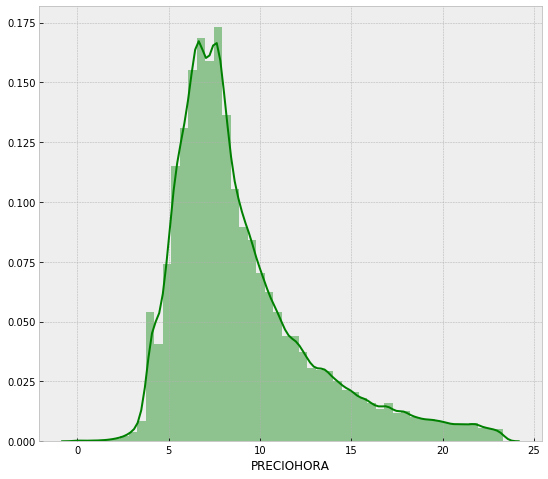

In [38]:
#y dibujamos la gráfica de nuevo: 
columnName = 'PRECIOHORA'
print(dfSueldos[columnName].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=50, hist_kws={'alpha': 0.4});

La columna sigue sin ser una distribución normal (estrictamente hablando) <br>
Pero la visualización es más clara. Tanto la media como la mediana de la gráfica, ronda los 9€/h. <br>

count    207992.000000
mean       1295.553388
std         638.557696
min           0.000000
25%         897.810000
50%        1168.975000
75%        1576.150000
max        3934.200000
Name: SALARIO, dtype: float64


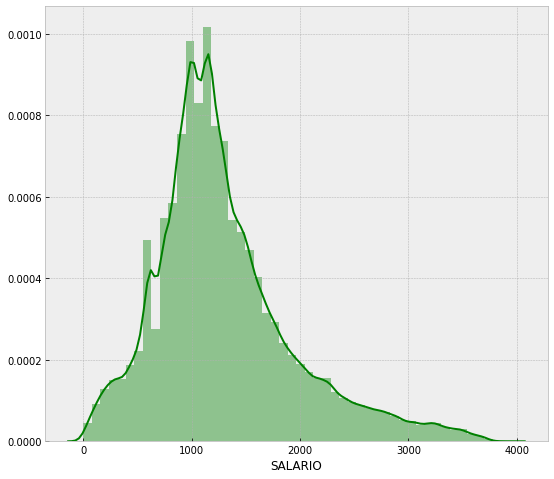

In [39]:
columnName = 'SALARIO'
print(dfSueldos[columnName].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=50, hist_kws={'alpha': 0.4});

Al igual que el precio hora, se parece a una distribución normal, pero como hemos vistos en los test anteriores no es así. 

### mirar gráficas Q-Q

### gráficas Q-Q

ref: https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

if it's needed: 
!pip install statsmodels 
example: 


// mirar - página 19 práctica de ejemplo

(poner en la documentación)



Para la comparación de la varianza, es decir para comprobar si las
varianzas entre los grupos a comparar son iguales (homocedasticidad), se
pueden usar por ejemplo el test de Levene, cuando los datos siguen una
distribución normal, o por ejemplo el test de Fligner-Killeen, que es la 


alternativa no paramétrica que se utiliza cuando los datos no siguen una
distribución normal (o cuando hay problemas con outliers no resueltos).
En ambos casos, la hipótesis nula asume la igualdad de varianzas en los
diferentes grupos de datos, con lo que si el p-valor obtenido es inferior al
nivel de significancia (generalmente α = 0,05) entonces se rechaza la
hipótesis nula y se concluye que hay heterocedasticidad. 


Las variables, que hemos comprobado anteriormente, no siguen una
distribución normal, pero si que es cierto que la variable **SALARIO** 

 está próxima a una distribución normal, con lo cual podemos utilizar el test de Levene
para la comprobación de varianzas. 



// Vamos a comprobar si las varianzas son iguales cuando
// comprobamos SALARIO y el grupo es "SEXO", es decir estamos
// comprobando la homogeneidad de varianzas de la edad en los grupos de
// HOMBRES Y MUJERES

ref: https://aaronschlegel.me/levenes-test-equality-variances-python.html El test de levene en Python

In [40]:
# Para hacer el test de levene, cogemos los registros en los que el trabajador tiene sexo = hombre (1):
registroshombres =  dfSueldos[(dfSueldos.SEXO == 1)] 

#y los  de las mujeres
registrosmujeres=dfSueldos[(dfSueldos.SEXO == 6)] 


In [41]:
import scipy.stats as stats

stats.levene(registroshombres['SALARIO'], registrosmujeres['SALARIO'], center='mean')

stats.levene(registroshombres['PRECIOHORA'], registrosmujeres['PRECIOHORA'], center='mean')

LeveneResult(statistic=525.2518123637237, pvalue=4.248882521278517e-116)

En ambos casos el p-value es INFERIOR a 0.05, tanto para el precio/hora, como para el salario. Por tanto asumimos que NO hay homogeneidad de varianzas entre los grupos.

Además, para el salario, vamos a ver la distribución de las muestras de una forma gráfica:

repasar esta gráfica

ref: https://ggplot2.tidyverse.org/reference/scale_manual.html

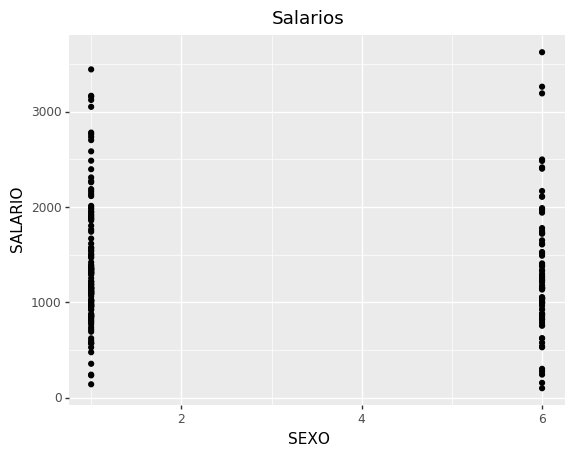

<ggplot: (-9223371838910952320)>

In [42]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_point, scale_x_discrete, labs


ggplot(dfSueldos.sample(200)) + aes(x="SEXO", y="SALARIO") + geom_point() + labs(title="Salarios")
# + scale_x_discrete(breaks= list([1, 6]),   labels=list(["Hombre", "Mujer"])) <-- no consigo reemplazar las labels! 
# 

A pesar de que el salario "parece" una distribución normal, como hemos visto los test de normalidad anteriores, NO es una distribución normal.

Así que si no nos convence el resultado del test de Levene, podemos además aplicar el de Fligner-Killeen:

In [43]:
from scipy.stats import fligner

print(fligner(registroshombres['SALARIO'], registrosmujeres['SALARIO']))
print(fligner(registroshombres['PRECIOHORA'], registrosmujeres['PRECIOHORA']))

FlignerResult(statistic=27.542164213474432, pvalue=1.537068213439582e-07)
FlignerResult(statistic=510.1102007780646, pvalue=6.001200488699651e-113)


Para el test de Fligner, se vuelve a confirmar que las varianzas del sueldo de hombres y mujeres NO son homogéneas (porque el pvalue es inferior a 0.05), luego se rechaza la hipótesis nula.

TODO: Se puede hacer este test, además de por sexo, por actividad, por estudios, por responsabilidad... etc....

## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc.
Aplicar al menos tres métodos de análisis diferentes.

Podemos calcular si hay diferencias significativas entre la media de salario, de mujeres y de hombres. En este caso podemos aplicar el test paramétrico t-test de Student, que requiere que las muestras a comparar sigan una distribución normal.

Por un lado vimos que la variable "Salario", no sigue exactamente una distribución normal, pero aplicando el teorema del límite central con una muestra suficientemente grande (mayor de 30, y en este caso lo es de sobra) se puede asumir que la variable sigue una distribución normal.

Cuando la normalidad y la homocedasticidad se cumplan (p-valores mayores al nivel de significancia), se podrán aplicar pruebas por contraste de hipótesis de tipo paramétrico, como la prueba t de Student. En los casos en los que no se cumplan (como el nuestro), se deberán aplicar pruebas no paramétricas como Wilcoxon (cuando se comparen datos dependientes) o Mann-Whitney (cuando los grupos de datos sean independientes).

En python, la prueba de Wilcoxon se aplica mediante el método wilcoxon de la librería stats. ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

Recordemos que ya hemos hecho el test de Shapiro-Wilk y el de Fligner-Killeen, así que aplicamos Wilcoxon directamente:

La hipótesis nula dice que no hay diferencias entre la media de salarios de hombres y mujeres, así que vamos a hacer el test de wilcoxon indicando que las distribuciones en los grupos son iguales:

In [44]:
from scipy.stats import wilcoxon
w, p = wilcoxon(registroshombres['SALARIO'].sample(registrosmujeres['SALARIO'].shape[0]), registrosmujeres['SALARIO'])
w, p

(1549402038.5, 0.0)

Podemos rechazar la hipótesis nula, completamente.

Vamos a probar con una hipótesis alternativa: "Los salarios de mujeres son menores que los de los hombres"

In [45]:
wilcoxon(registroshombres['SALARIO'].sample(registrosmujeres['SALARIO'].shape[0]), registrosmujeres['SALARIO'],  alternative='less')

WilcoxonResult(statistic=2617685404.0, pvalue=1.0)

En este caso pvalue si es mayor de 0.05, así que podemos confirmar que se cumple la hipótesis alternativa: el salario de las mujeres es menor que el de los hombres.

En python el método de la libreria stats "ttest_rel" nos permite ejecutar la prueba t de Student a dos ejemplos relacionados. ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

//BORRAR? , pero también con ese mismo comando realiza el test de Welch cuando las varianzas entre las muestras son diferentes. Por tanto, inicialmente habría que comprobar si las varianzas entre ambas muestras son iguales, para determinar si aplicar uno u otro.

Eso ya lo hicimos en el apartado anterior, en el que aplicamos Levene y Fligner-Killeen. También la variable sigue una distribución normal, se puede aplicar el F-test (que no aplicamos en su momento y lo podemos aplicar por ejemplo ahora).

In [46]:
# Si encontramos dos variables cuya normalidad y la homocedasticidad se cumplan, podemos hacer el test de Student:

# # F-Test
# # ref: https://www.statology.org/f-critical-value-python/
# # code from: https://www.statology.org/f-test-python/

# import scipy.stats


# #define F-test function
# def f_test(x, y):
#     x = np.array(x)
#     y = np.array(y)
#     f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
#     dfn = x.size-1 #define degrees of freedom numerator 
#     dfd = y.size-1 #define degrees of freedom denominator 
#     p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
#     return f, p


# f_test(registroshombres['SALARIO'], registrosmujeres['SALARIO'])

# # Se vuelve a comprobar que las varianzas son diferentes, ya que p-value sigue saliendo menor de 0.05

# # Vamos a comparar las medias de los dos grupos, con t-Test. 

# from scipy import stats
# stats.ttest_rel(registroshombres['SALARIO'].sample(10000), registrosmujeres['SALARIO'].sample(10000))


# from scipy import stats
# stats.ttest_rel(registroshombres['PRECIOHORA'].sample(10000), registrosmujeres['PRECIOHORA'].sample(10000))

//buscar un ejemplo de dos variables categóricas.

Por último, en ocasiones se querrá comparar si existen diferencias significativas en una variable categórica entre los grupos definidos por otra variable categórica. En ese caso, se puede aplicar el test de en R, mediante la función chisq.test(), como muestra el siguiente ejemplo.

A partir de las frecuencias de cada sabor de helado para cada uno de los grupos, se observa que hombres y mujeres muestran diferencias significativas en sus gustos.

Podemos querer saber por ejemplo la relación que existe (si es que existe entre la clase "Estudios" (ESTU) y el "sexo" (SEXO).

Al ser 2 variables categóricas vamos a aplicar por ejemplo el test Chi-Cuadrado. Aquí la hipótesis nula nos dice que las variables son independientes. Vamos a comprobarlo:

## RANDOM FOREST REGRESSOR

Vamos ahora a generar un modelo qeu nos ayude a predecir el salario de una persona a partir de los datos introducidos.

Utilizaremos un Random Forest Regressor ya que nuestros datos contienen unas cuantas variables categóricas y este tipo de modelos funcionan mejor con este tipo de variables.

Tambien aprvecharemos para obtener información sobre que variables detecta nuestro modelo que influyen más sobre el salario.


En primer lugar realizaremos algunas trasnformaciones sobre nuetro dataset para para que los datos se ajusten a lo que nuestro modelo necesita.

In [47]:
# Use numpy to convert to arrays
import numpy as np

############### REDUCIMOS TAMAÑO EN LAS PRUEBAS ###############
features= dfSueldos.sample(frac=0.3, random_state = 1)

#features= dfSueldos


features_df = dfSueldos

#cambiamos las columnas CNACE y CNO1 a categorical
features['CNACE'] = features['CNACE'].astype('category')
features['CNO1'] = features['CNO1'].astype('category')

CNACE = features['CNACE'].astype('category')
CNO1 = features['CNO1'].astype('category')

features["CNACE"] = features["CNACE"].cat.codes
features["CNO1"] = features["CNO1"].cat.codes


Podemos realizar nuestro estudio sobre las variables **SALARIO** o **PRECIOHORA**. Vamos a utilizar **SALARIO** inicialmente.

In [48]:

columnToStudy = 'SALARIO'

# almacenamos los datos de la colomuna a estudiar para poder realizar comparaciones.
labels = np.array(features[columnToStudy])

#Quitamos las columnas que que no queremos qeu influyan en el modelo ya qeu están relacionadas entre ellas.
columns = ['SALARIO','PRECIOHORA','SALBASE']
features = features.drop(columns, axis = 1)


#Vamos a transformar nuestro dataset a array, así que guardamos los nombres de las columnas para más adelante.
feature_list = list(features.columns)
features = np.array(features)

In [49]:
# Aplicamos Random Forest Regresor

from sklearn.model_selection import train_test_split
# Obtenemos conjuntos de entrenamiento y test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [50]:
import time
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor

# Durante las pruebas hemos calculado los tiempos que costaba entrenar el modelo para poder planificar mejor nuestras actuaciones
start = time.time()
print(f"Proceso iniciado a las: {timedelta(seconds=start)}")


# Instanciamos el modelo. Hemos probado con diferentes parámetros pero lo hemos dejado con 1000. 
# Esto hace que el entrenamiento del modelo tarde bastante más, pero creemos que obtiene mejores resultados.
rf = RandomForestRegressor(n_estimators = 200, random_state = 0)
# Entrenamos el modelo con el conjunto de entrenamiento
rf.fit(train_features, train_labels);

# Tiempo final
end = time.time()

# Mostramos el tiempo transcurrido para entrenar el modelo.
print(f"Proceso finalizado a las: {timedelta(seconds=end)}")
print(f"Tiempo total: {timedelta(seconds=end - start)}")


Proceso iniciado a las: 18630 days, 12:17:03.731359
Proceso finalizado a las: 18630 days, 12:18:04.080816
Tiempo total: 0:01:00.349457


In [51]:
# Ahora vamos a comprobar las predicciones realizadas
predictions = rf.predict(test_features)


In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Error absoluto medio (MAE)
mae = mean_absolute_error(test_labels.ravel(), predictions)

# Error cuadrático medio (MSE)
mse = mean_squared_error(test_labels.ravel(), predictions)

# R-squared scores
r2 = r2_score(test_labels.ravel(), predictions)

# Print metrics
print('Error absoluto medio (MAE):', round(mae, 2))
print('Error cuadrático medio (MSE):', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Error absoluto medio (MAE): 242.3
Error cuadrático medio (MSE): 129751.19
R-squared scores: 0.68


Vemos que nuestro modelo no consigue unos datos espectaculares quedandándose solo en 68% de aciertos.

Una vez generado nuestro modelo de regresión, vamos a comprobar como le influyen las diferentes variables utilizadas.

Vamos a comprobar la **Feature Importance** obtenida por nuestro modelo y vamos a representarla mediante un par de gráficas que nos ayude a entender mejor que variables están influyendo más.

In [53]:
# Obtenemos la Feature Importance
importances = list(rf.feature_importances_)

# Les añadimos los nombres de columnas para hacerlas más entendibles
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Ahora vamos a ordenar y mostrar los resultados
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: JSP1                 Importance: 0.2467
Variable: COMSAL               Importance: 0.1105
Variable: MESANTI              Importance: 0.1026
Variable: JAP                  Importance: 0.0953
Variable: ESTU                 Importance: 0.078
Variable: CNACE                Importance: 0.0759
Variable: CNO1                 Importance: 0.0631
Variable: EXTRAORM             Importance: 0.0621
Variable: NUTS1                Importance: 0.0261
Variable: REGULACION           Importance: 0.0253
Variable: MERCADO              Importance: 0.0205
Variable: ESTRATO2             Importance: 0.02
Variable: ANOS2                Importance: 0.0191
Variable: SEXO                 Importance: 0.0127
Variable: CONTROL              Importance: 0.012
Variable: COMSALTT             Importance: 0.012
Variable: TIPOJOR              Importance: 0.0062
Variable: TIPOCON              Importance: 0.005
Variable: PHEXTRA              Importance: 0.0027
Variable: TIPOPAIS             Importance: 0.0024
Variab

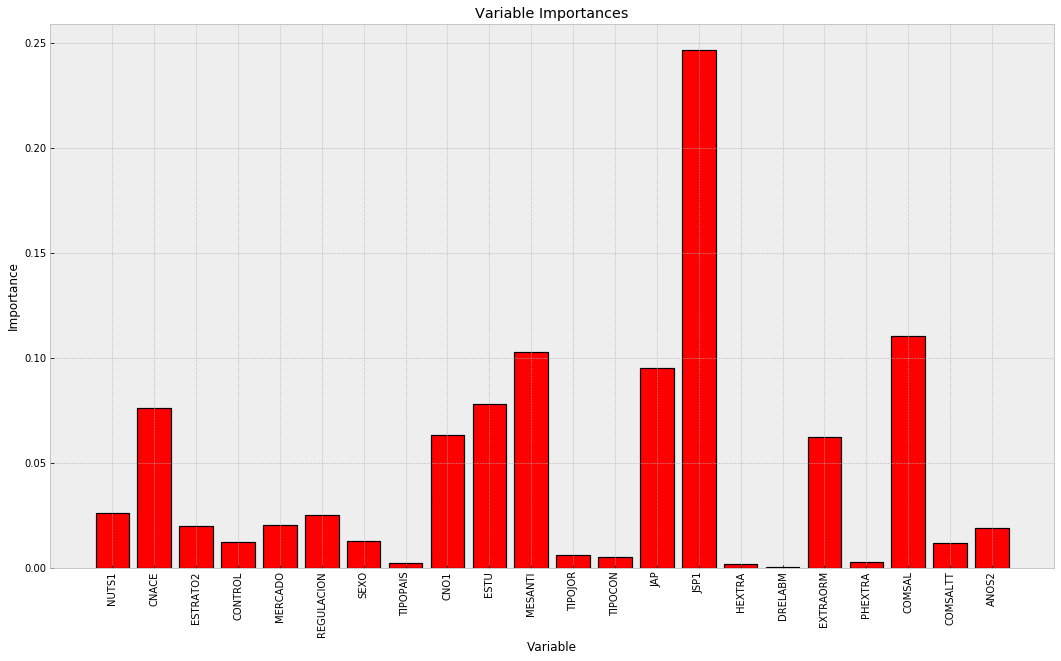

In [54]:
# Obtenemos las variables a mostrar en le gráfico
x_values = list(range(len(feature_importances)))

f, ax = plt.subplots(figsize=(18,10))
# Generamos un gráfico de barras 
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

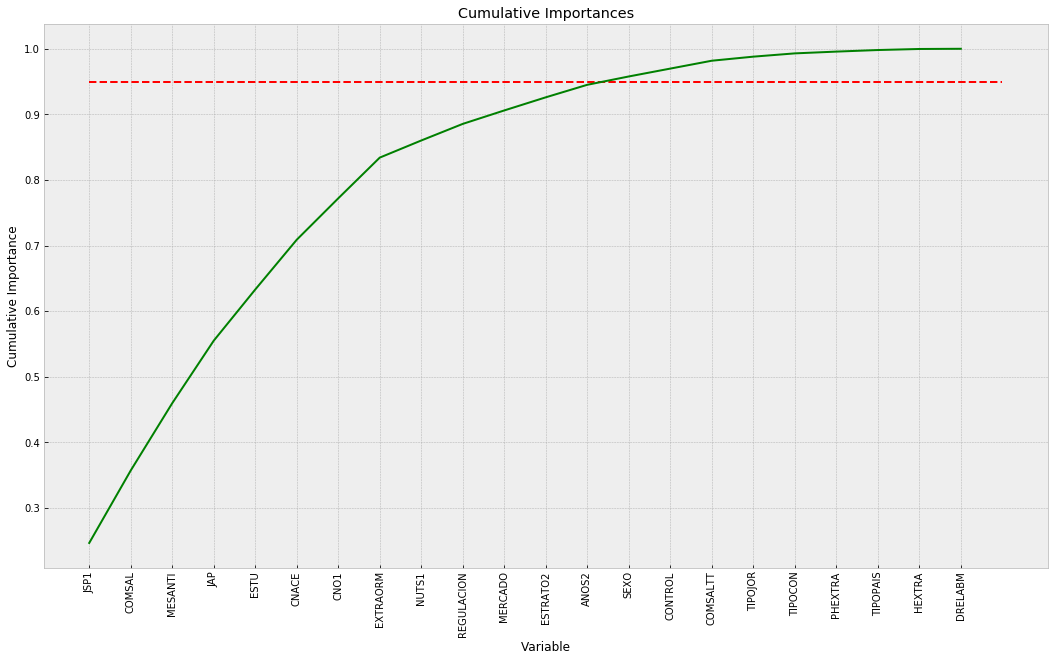

In [79]:
# Realizamos un nuevo gráfico con las variables ordenadas
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

cumulative_importances = np.cumsum(sorted_importances)

f, ax = plt.subplots(figsize=(18,10))
plt.plot(x_values, cumulative_importances, 'g-')

plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

Podemos comprobar como **JSP1** (JORNADA SEMANAL PACTADA  (HORAS)) es la variable que más influye, pero que el peso está bastante repartido.


Vamos a realizar unas comparaciones de la distribución de salarios que predice nuestro modelo con la distribución de salario real.

In [56]:
# Obtenemos el dataset inicial y lo transormamos en arrays para poder pasarselo al  modelo.

features_comprobacion = dfSueldos

#cambiamos las columnas CNACE y CNO1 a categorical
features_comprobacion['CNACE'] = features_comprobacion['CNACE'].astype('category')
features_comprobacion['CNO1'] = features_comprobacion['CNO1'].astype('category')

CNACE = features_comprobacion['CNACE'].astype('category')
CNO1 = features_comprobacion['CNO1'].astype('category')

features_comprobacion["CNACE"] = features_comprobacion["CNACE"].cat.codes
features_comprobacion["CNO1"] = features_comprobacion["CNO1"].cat.codes


In [57]:
#Quitamos las columnas que utilizamos en la predicción
columns = ['SALARIO','PRECIOHORA','SALBASE']
features_comprobacion = features_comprobacion.drop(columns, axis = 1)

features_comprobacion = np.array(features_comprobacion)

prediccion =  rf.predict(features_comprobacion)

In [58]:
#Añadimos la predicción al dataset original
dfWithPrediccion = dfSueldos
dfWithPrediccion['Prediccion'] = prediccion

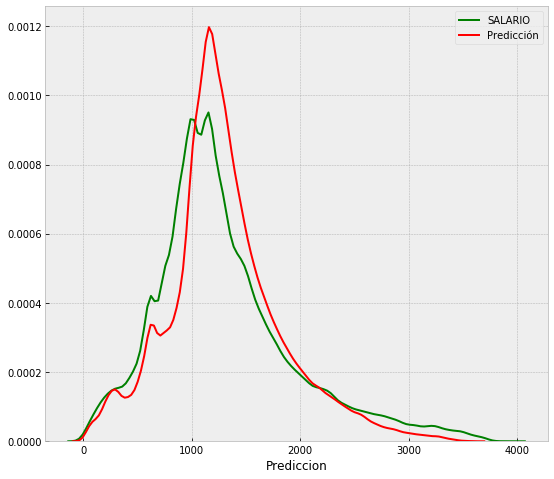

In [59]:
fig = plt.figure(figsize=(9, 8))
sns.distplot(dfWithPrediccion[columnToStudy], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = columnToStudy);
sns.distplot(dfWithPrediccion['Prediccion'], color='r', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Predicción');

Podemos ver que nuestra predicción está algo desajustada de la distribución real. Sobre todo en la parte central de la distribución.


# Comparación de sueldos 

Ahora vamos a realizar diferentes comparaciones de la variable **SALARIO** tratando de entender mejor si existen diferencias por sexo con respecto a esta variable.
En nuestro modelo anterior para predecir el salario la variable **SEXO** no parece tener una imporación capital.

Vamos a ver que pasa si comparamos datos.
Realizaremos diferentes comparativas por diferentes categorías de los datos a ver que conclusiones podemos obtener.

## Compración por sexo

Primero realizaremos una comparación general de los dos sexos y luego una comparción contra los datos que predice nuestro modelo.

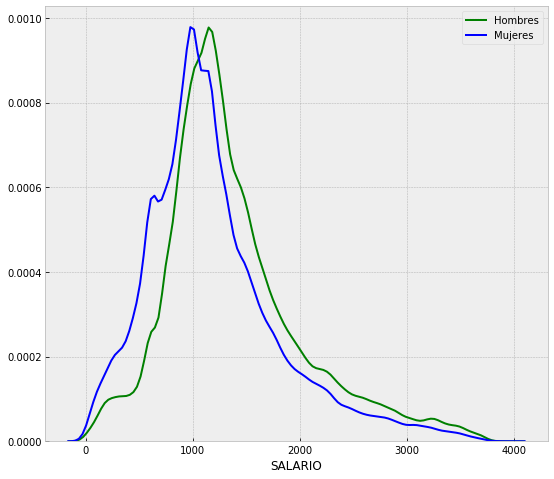

In [60]:
hombres = dfWithPrediccion[dfWithPrediccion['SEXO'] == 1]
mujeres = dfWithPrediccion[dfWithPrediccion['SEXO'] == 6]

fig = plt.figure(figsize=(9, 8))
sns.distplot(hombres[columnToStudy], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = 'Hombres');
sns.distplot(mujeres[columnToStudy], color='b', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Mujeres');

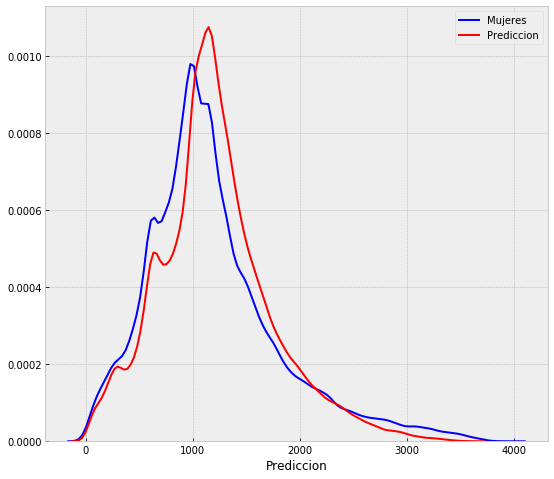

In [61]:
fig = plt.figure(figsize=(9, 8))
sns.distplot(mujeres[columnToStudy], color='b', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = 'Mujeres');
sns.distplot(mujeres['Prediccion'], color='r', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Prediccion');

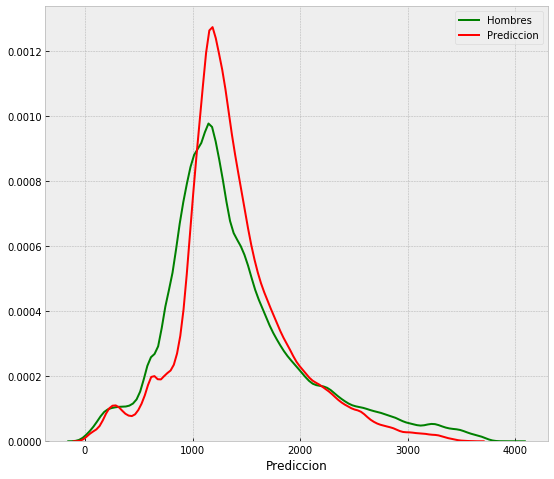

In [62]:
fig = plt.figure(figsize=(9, 8))
sns.distplot(hombres[columnToStudy], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = 'Hombres');
sns.distplot(hombres['Prediccion'], color='r', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Prediccion');

## Comprobamos sueldo por edad y sexo


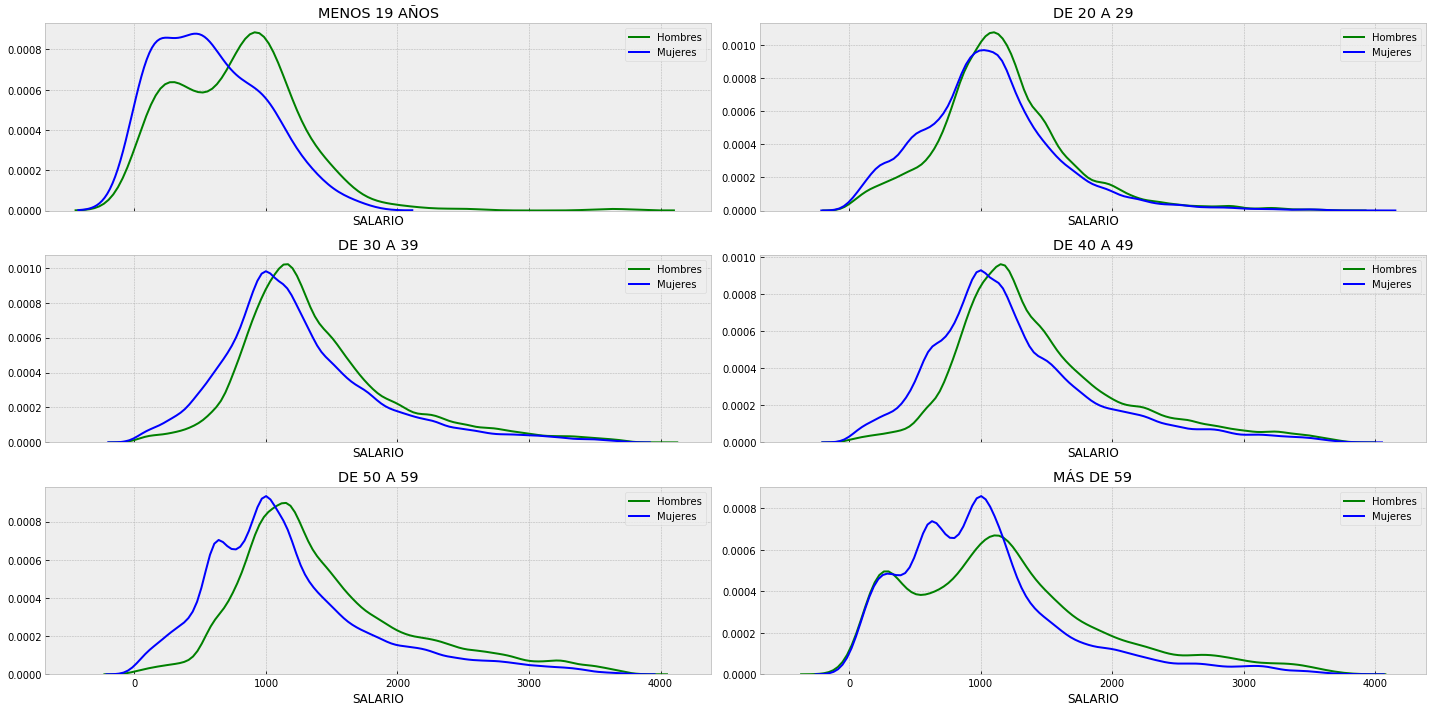

In [64]:
#Por Edad

edades = {1: 'MENOS 19 AÑOS',
2:'DE 20 A 29',    
3:'DE 30 A 39',    
4:'DE 40 A 49',    
5:'DE 50 A 59',    
6:'MÁS DE 59'}  

columnToSearch = 'ANOS2'

f, axes = plt.subplots(3, 2, figsize=(20, 10), sharex=True)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i+1]
    hombres = df_category[df_category['SEXO'] == 1]
    mujeres = df_category[df_category['SEXO'] == 6]
    sns.distplot(hombres[columnToStudy], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = 'Hombres', ax = ax);
    sns.distplot(mujeres[columnToStudy], color='b', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Mujeres', ax = ax);
    ax.set_title(edades[i+1])

f.tight_layout()


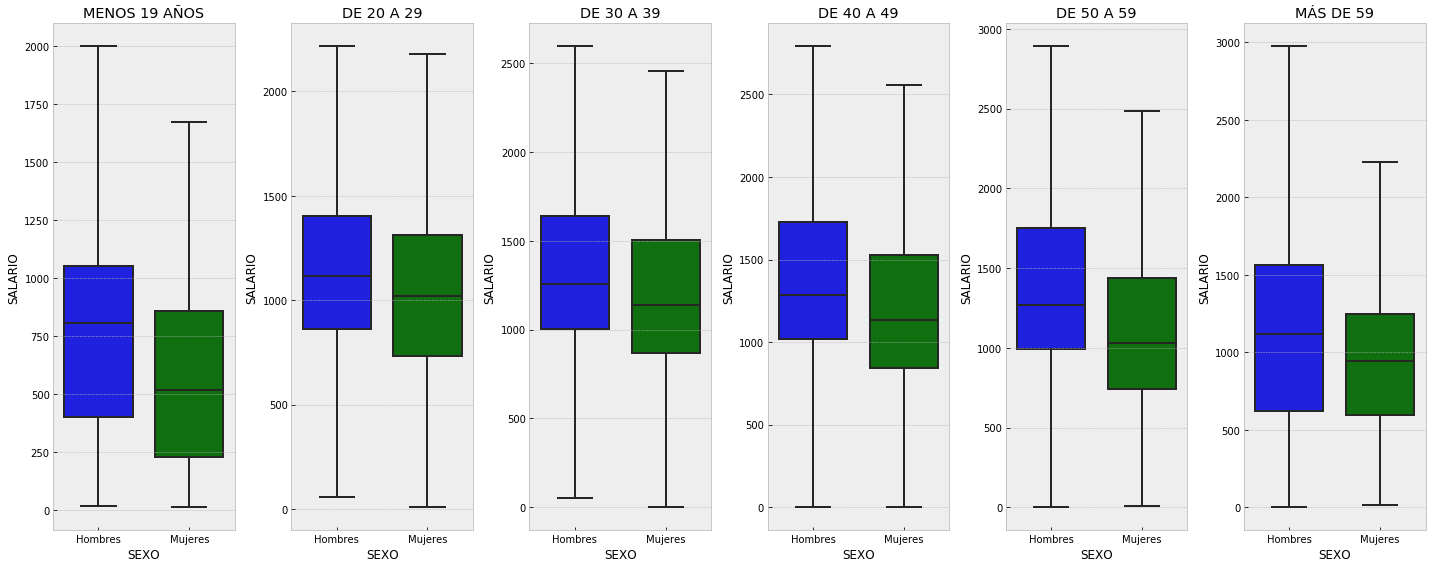

In [65]:

f, axes = plt.subplots(1, 6, figsize=(20,8), sharex=False)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i+1]
    if (len(df_category)>0):
        my_pal = {1: "blue", 6: "green"}
        
        a = sns.boxplot(x='SEXO', y="SALARIO",  data=df_category, ax=ax, palette=my_pal, showfliers = False, width=0.75)

        ax.set(xticklabels=['Hombres', 'Mujeres'])
        ax.set_title(edades[i+1])
        
        
    else:
        ax.axis('off')


f.tight_layout();

    

Parece que los sueldos para el sexo femenino son inferiores en todas las categorías de edad. Las diferencias más apreciables se producen en las franjas de **Menos de 19** y **De 50 a 59**.

# Comprobamos sueldo por puesto y sexo

Como los nombres de los valores de esta categoría son tan grandes los hemos reducido en las gráficas.
Los mostramos aquí completos para poder consultarlos facilmente.

| Codigo | Puesto                                                                                                     |
|--------|:-----------------------------------------------------------------------------------------------------------|
| 0      | DIRECTORES Y GERENTES                                                                                      |
| 1      | TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES DE LA SALUD Y LA ENSEÑANZA                            |
| 2      | OTROS TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES                                                 |
| 3      | TÉCNICOS; PROFESIONALES DE APOYO                                                                           |
| 4      | EMPLEADOS DE OFICINA QUE NO ATIENDEN AL PÚBLICO                                                            |
| 5      | EMPLEADOS DE OFICINA QUE ATIENDEN AL PÚBLICO                                                               |
| 6      | TRABAJADORES DE LOS SERVICIOS DE RESTAURACION Y COMERCIO                                                   |
| 7      | TRABAJADORES DE LOS SERVICIOS DE SALUD Y EL CUIDADO DE PERSONAS                                            |
| 8      | TRABAJADORES DE LOS SERVICOS DE PROTECCION Y SEGURIDAD                                                     |
| 9      | TRABAJADORES CUALIFICADOS EN EL SECTOR AGRÍCOLA, GANADERO, FORESTAL Y PESQUERO                             |
| 10     | TRABAJADORES CUALIFICADOS DE LA CONSTRUCCION, EXCEPTO LOS OPERADORES DE MÁQUINAS                           |
| 11     | TRABAJADORES CUALIFICADOS DE LAS INDUSTRIAS MANUFACTURERAS, EXCEPTO OPERADORES DE INSTALACIONES Y MÁQUINAS |
| 12     | OPERADORES DE INSTALACIONES Y MAQUINARIA FIJAS, Y MONTADORES                                               |
| 13     | CONDUCTORES Y OPERADORES DE MAQUINARIA MOVIL                                                               |
| 14     | TRABAJADORES NO CUALIFICADOS EN SERVICIOS                                                                  |
| 15     | PEONES DE LA AGRICULTURA, PESCA, CONSTRUCCIÓN, INDUSTRIAS MANUFACTURERAS Y TRANSPORTES                     |
| 16     | OCUPACIONES MILITARES                                                                                      |

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.


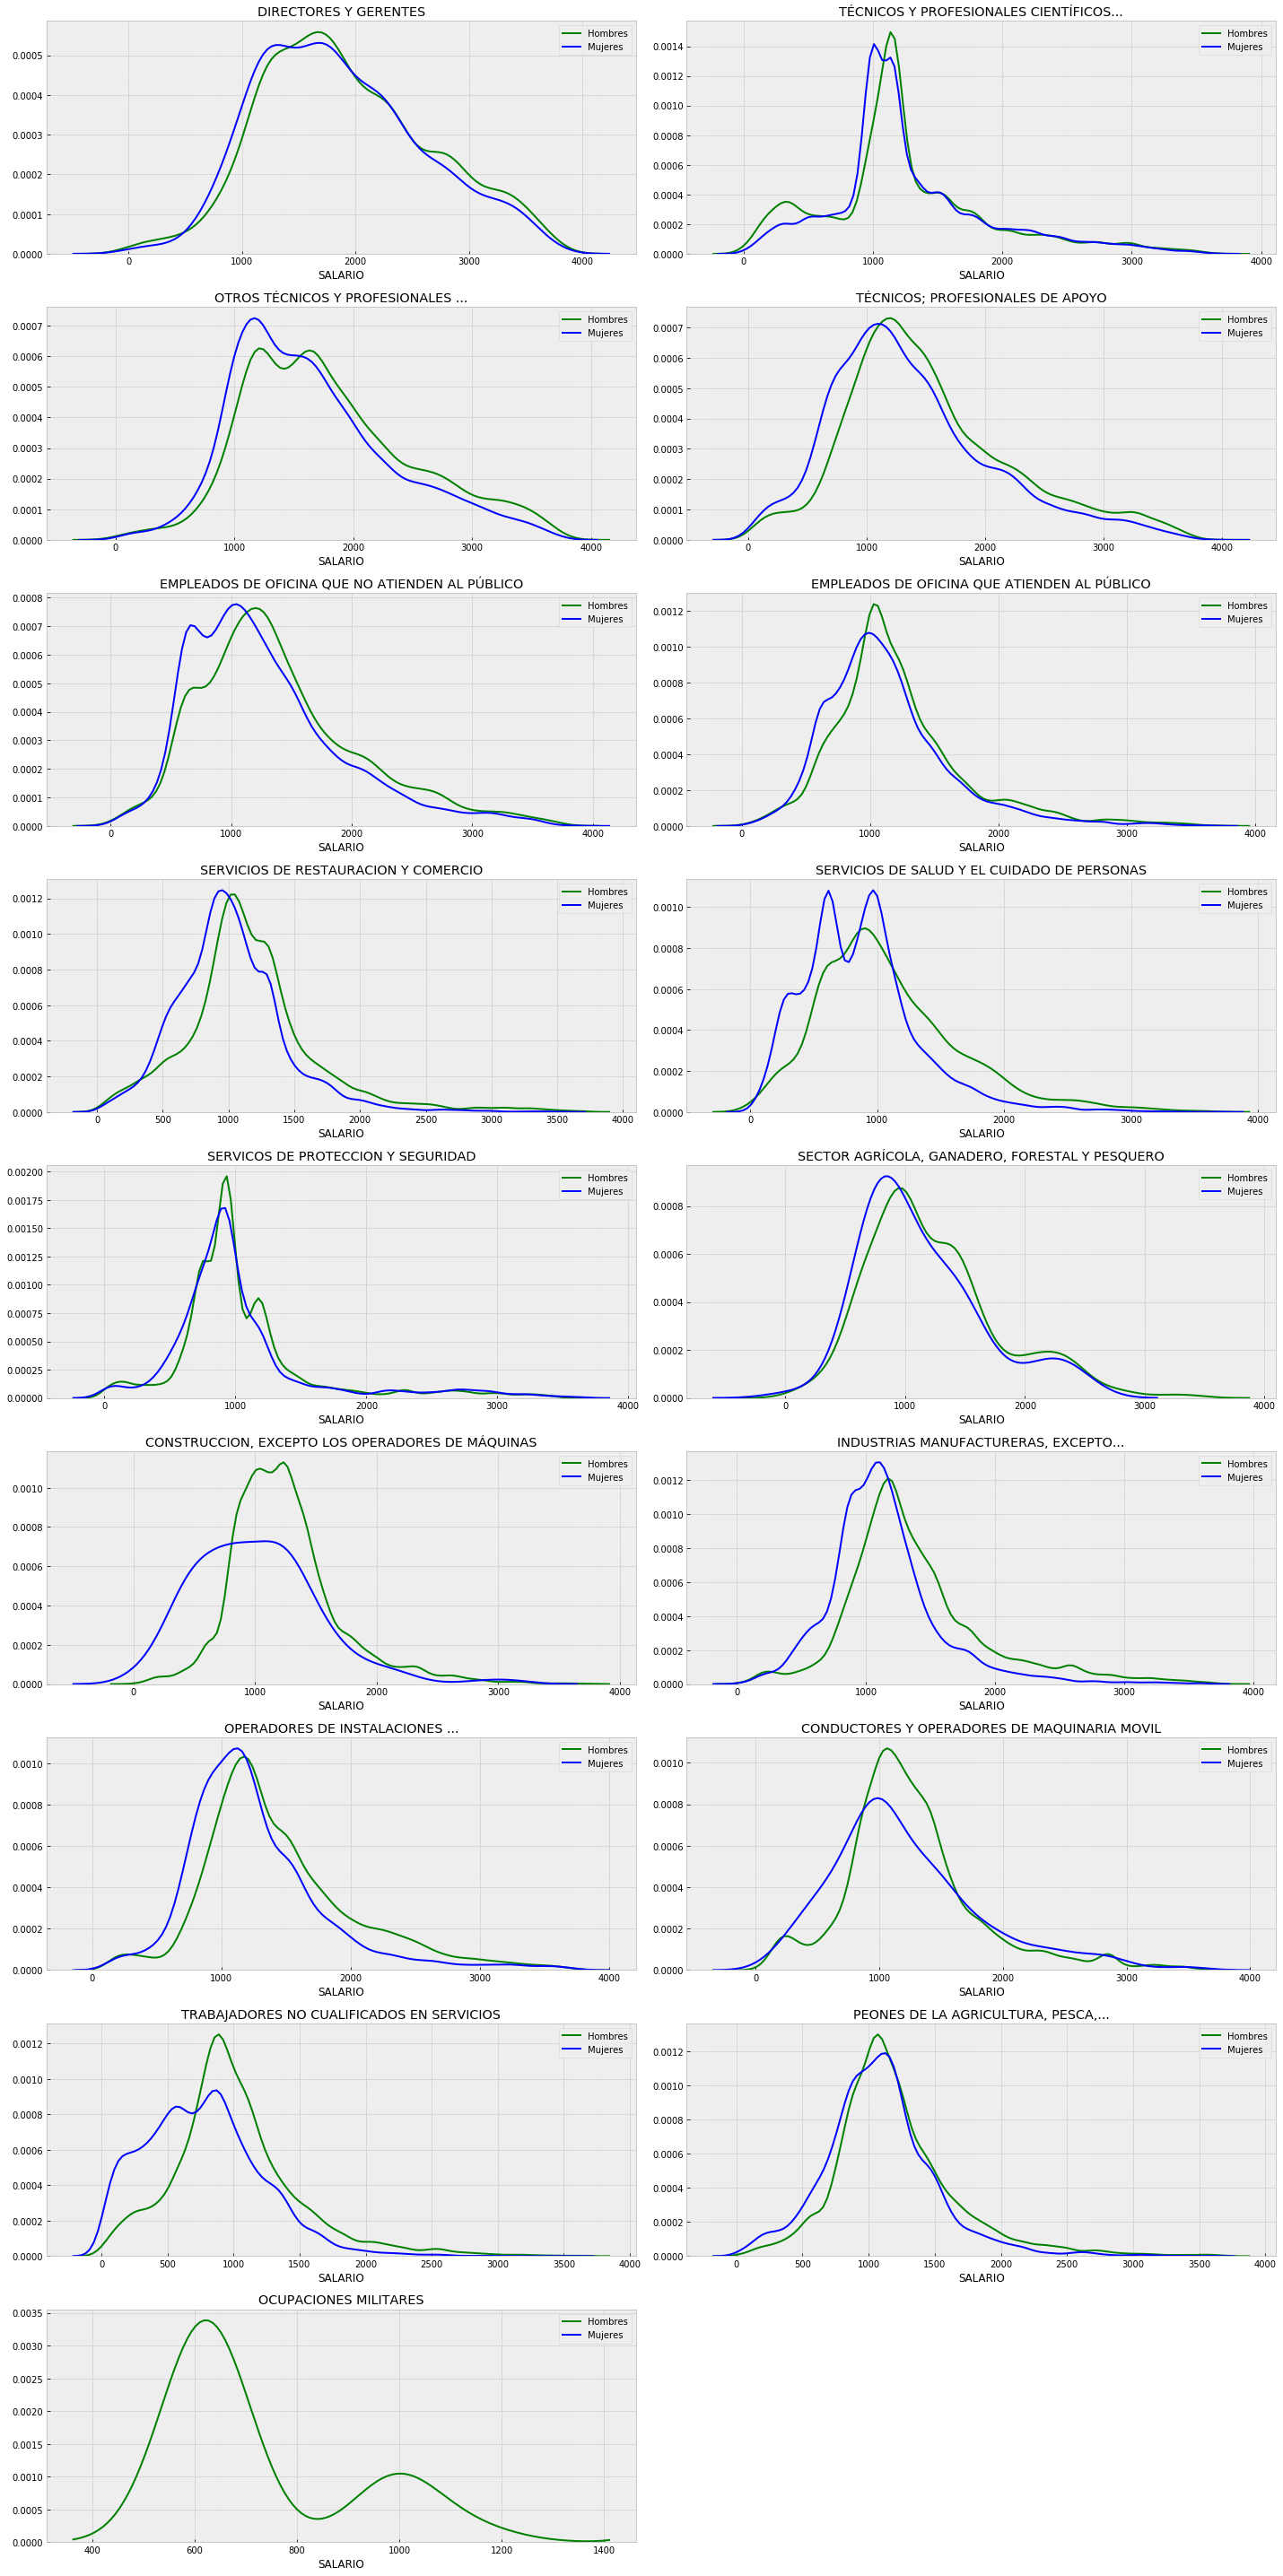

In [66]:
#Por cargo

cargos = {0:'DIRECTORES Y GERENTES',
1:'TÉCNICOS Y PROFESIONALES CIENTÍFICOS...',
2:'OTROS TÉCNICOS Y PROFESIONALES ...',
3:'TÉCNICOS; PROFESIONALES DE APOYO',
4:'EMPLEADOS DE OFICINA QUE NO ATIENDEN AL PÚBLICO',
5:'EMPLEADOS DE OFICINA QUE ATIENDEN AL PÚBLICO',
6:'SERVICIOS DE RESTAURACION Y COMERCIO',
7:'SERVICIOS DE SALUD Y EL CUIDADO DE PERSONAS',
8:'SERVICOS DE PROTECCION Y SEGURIDAD',
9:'SECTOR AGRÍCOLA, GANADERO, FORESTAL Y PESQUERO',
10:'CONSTRUCCION, EXCEPTO LOS OPERADORES DE MÁQUINAS',
11:'INDUSTRIAS MANUFACTURERAS, EXCEPTO...',
12:'OPERADORES DE INSTALACIONES ...',
13:'CONDUCTORES Y OPERADORES DE MAQUINARIA MOVIL',
14:'TRABAJADORES NO CUALIFICADOS EN SERVICIOS',
15:'PEONES DE LA AGRICULTURA, PESCA,...',
16:'OCUPACIONES MILITARES'}

columnToSearch = 'CNO1'

f, axes = plt.subplots(9, 2, figsize=(20, 40), sharex=False)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i]
    if (len(df_category)>0):
        hombres = df_category[df_category['SEXO'] == 1]
        mujeres = df_category[df_category['SEXO'] == 6]
        sns.distplot(hombres[columnToStudy], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = 'Hombres', ax = ax);
        sns.distplot(mujeres[columnToStudy], color='b', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Mujeres', ax = ax);
        ax.set_title(cargos[i])
    else:
        ax.axis('off')

f.tight_layout()
    

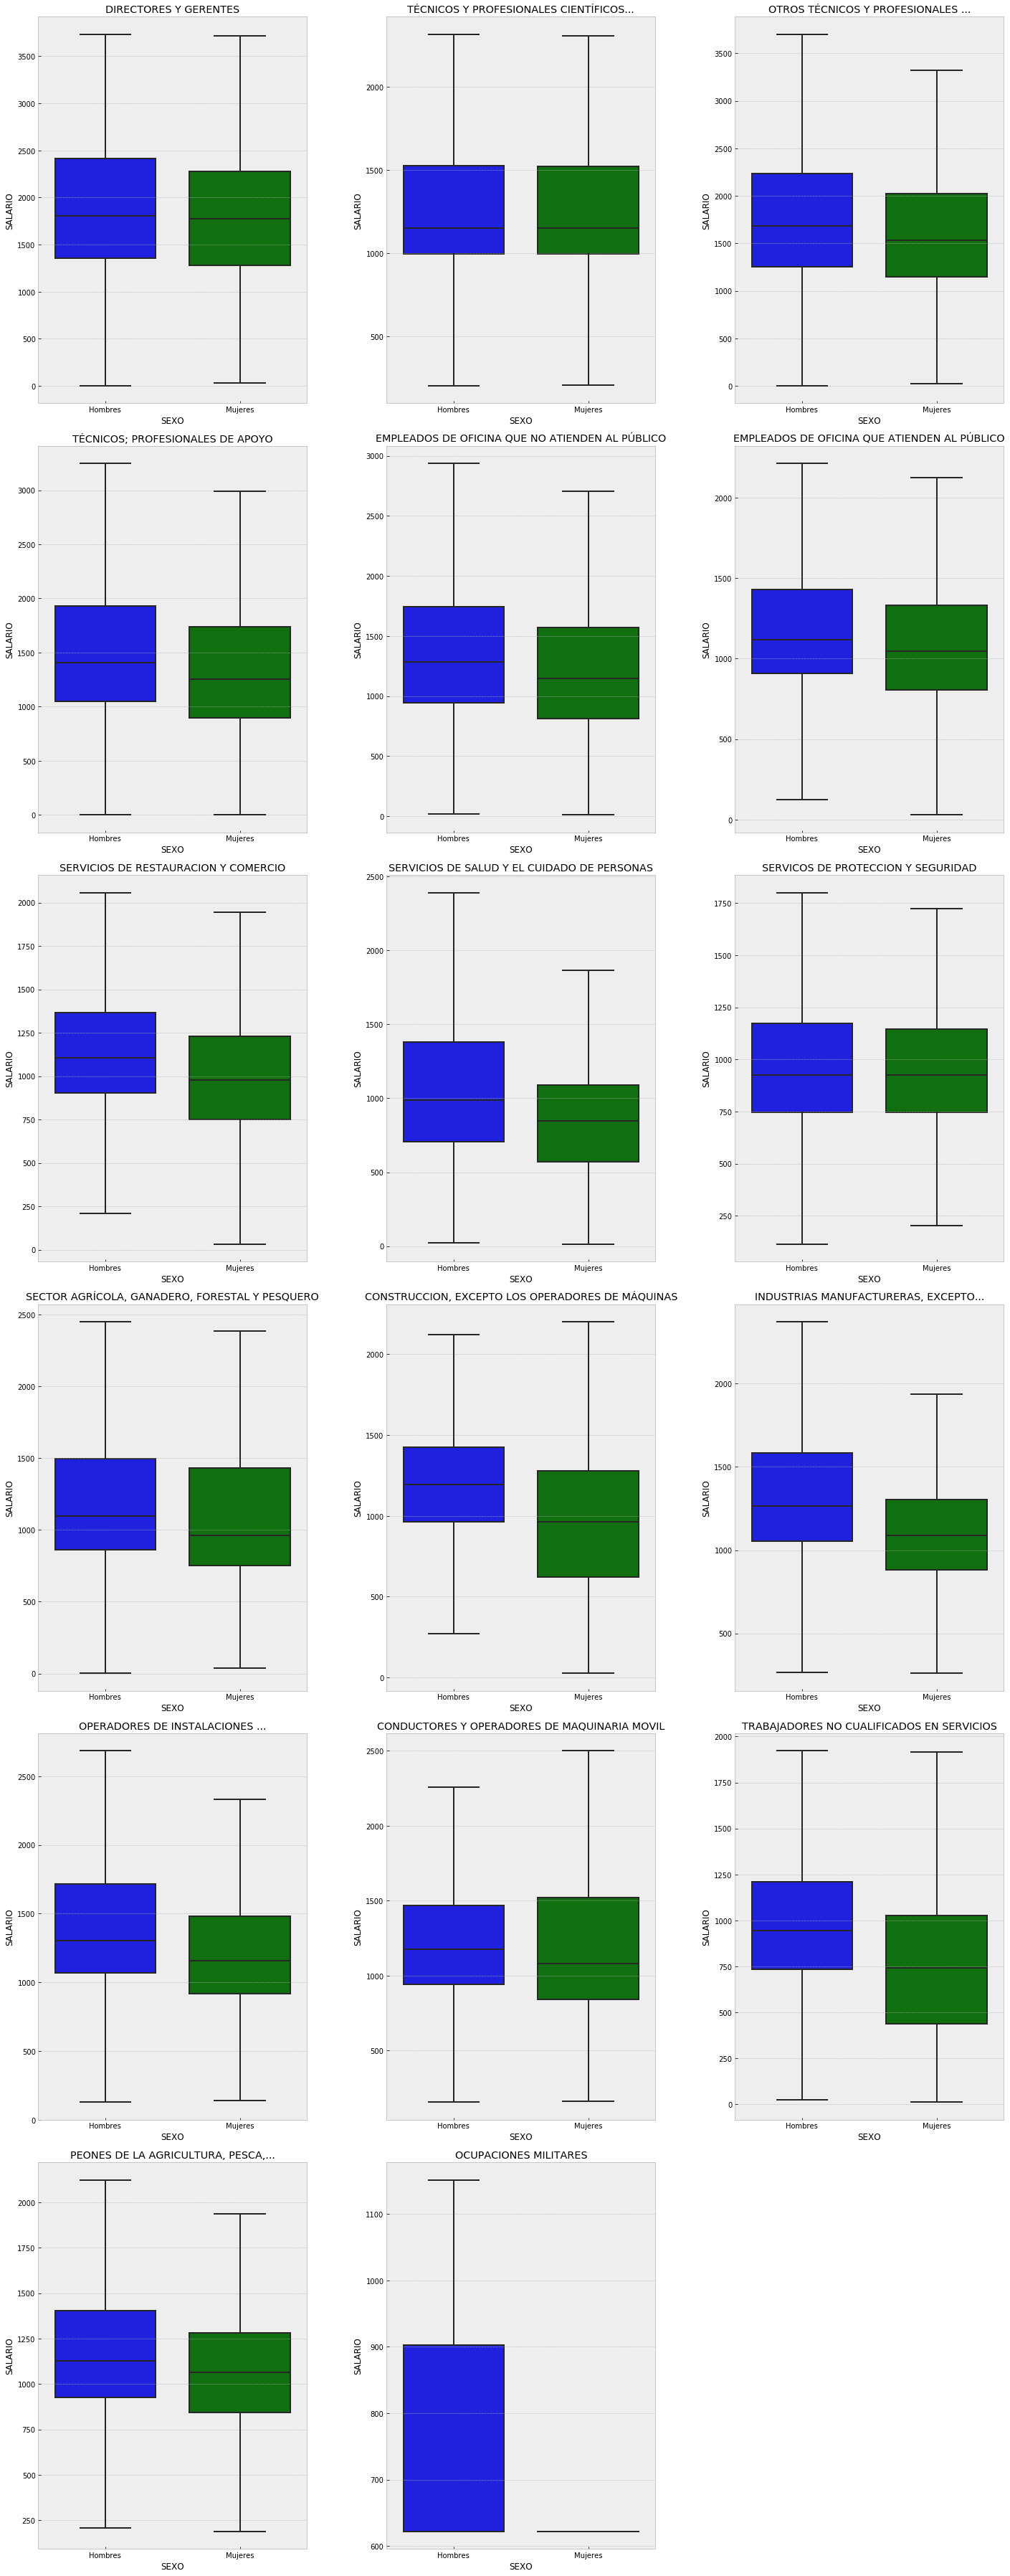

In [67]:
f, axes = plt.subplots(6, 3, figsize=(20,50), sharex=False)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i]
    if (len(df_category)>0):
        my_pal = {1: "blue", 6: "green"}
        
        a = sns.boxplot(x='SEXO', y="SALARIO",  data=df_category, ax=ax, 
                         palette=my_pal, showfliers = False, width=0.75)

        ax.set(xticklabels=['Hombres', 'Mujeres'])
        ax.set_title(cargos[i])
        
    else:
        ax.axis('off')


f.tight_layout();


Seguimos observando una tendencia en las gráficas de la distribución de salarios, donde las distribuciones de las mujeres aparecen escoradas hacia la izquierda, y con las gráficas de boxplot mostrando las medias y las concentraciones de sueldos de las mujeres por debajo de los hombres salvo en contadas excepciones, como los trabajos científicos e intelectuales, y los trabajos enfocados en protección y seguridad donde se encuentran todos los cuerpos de policía y bomberos y los sueldos están regulados por el gobierno.

Como curiosidad, en todo el dataset solo exisitía un registro de sexo femenino de profesión ocupaciones militares.

# Comprobamos sueldo por nivel de estudios y sexo

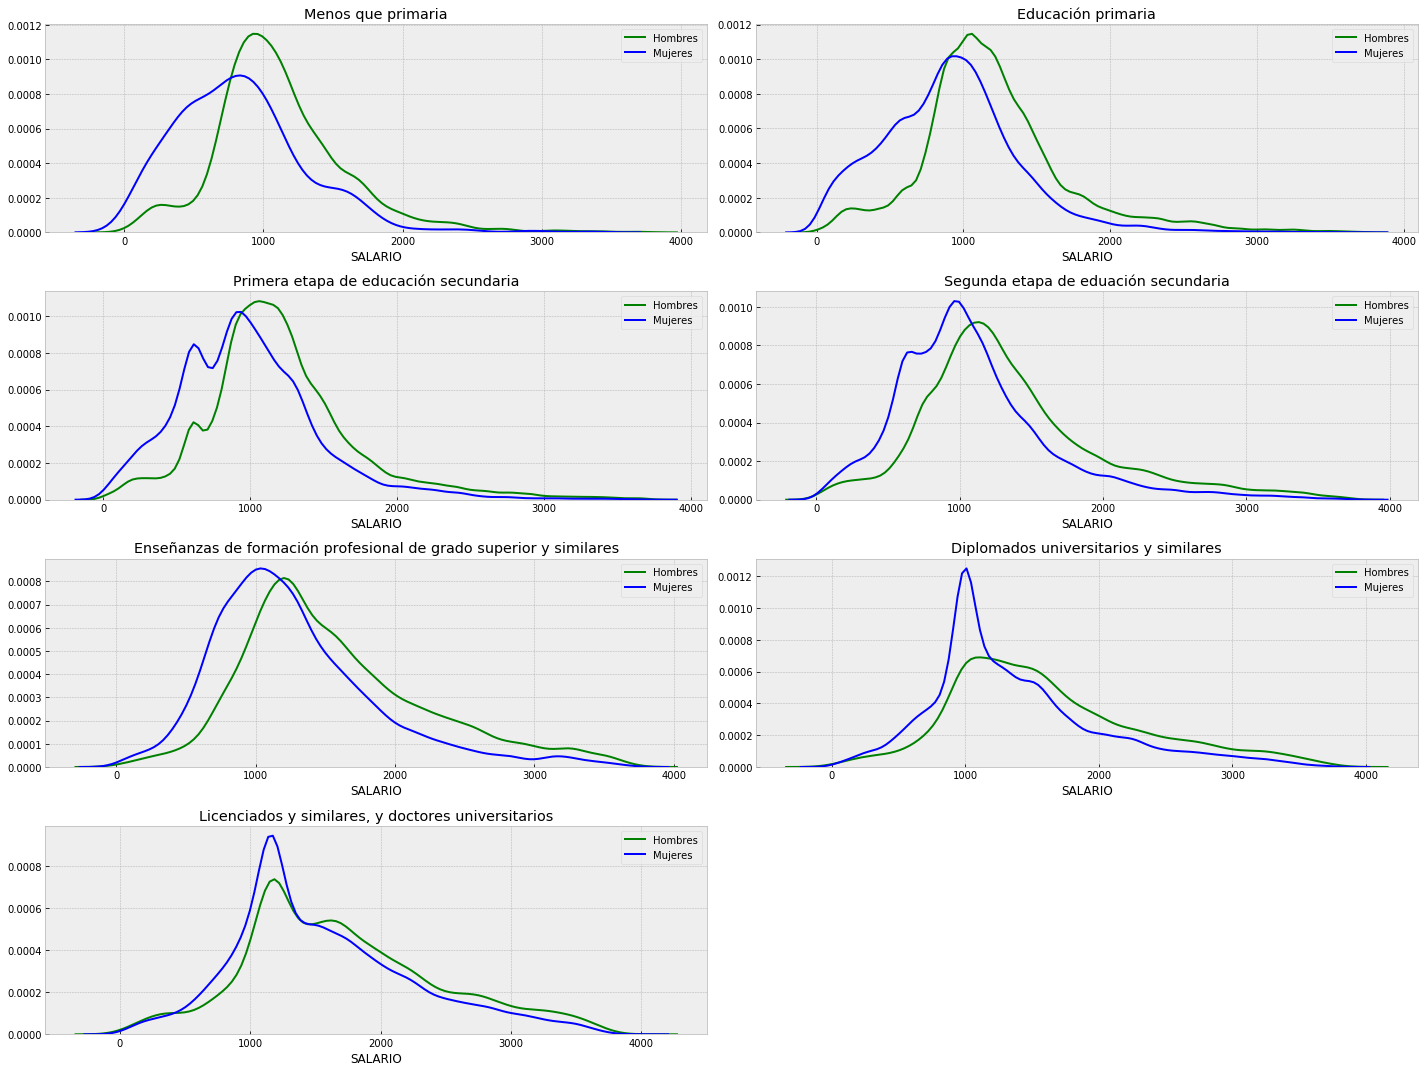

In [68]:

estudios = {1:'Menos que primaria',
2:'Educación primaria',
3:'Primera etapa de educación secundaria',
4:'Segunda etapa de eduación secundaria',
5:'Enseñanzas de formación profesional de grado superior y similares',
6:'Diplomados universitarios y similares',
7:'Licenciados y similares, y doctores universitarios'}


columnToSearch = 'ESTU'

f, axes = plt.subplots(4, 2, figsize=(20, 15), sharex=False)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i+1]
    if (len(df_category)>0):
        hombres = df_category[df_category['SEXO'] == 1]
        mujeres = df_category[df_category['SEXO'] == 6]
        sns.distplot(hombres[columnToStudy], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = 'Hombres', ax = ax);
        sns.distplot(mujeres[columnToStudy], color='b', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Mujeres', ax = ax);
        ax.set_title(estudios[i+1])
        f.tight_layout()
    else:
        ax.axis('off')
    #f.show()

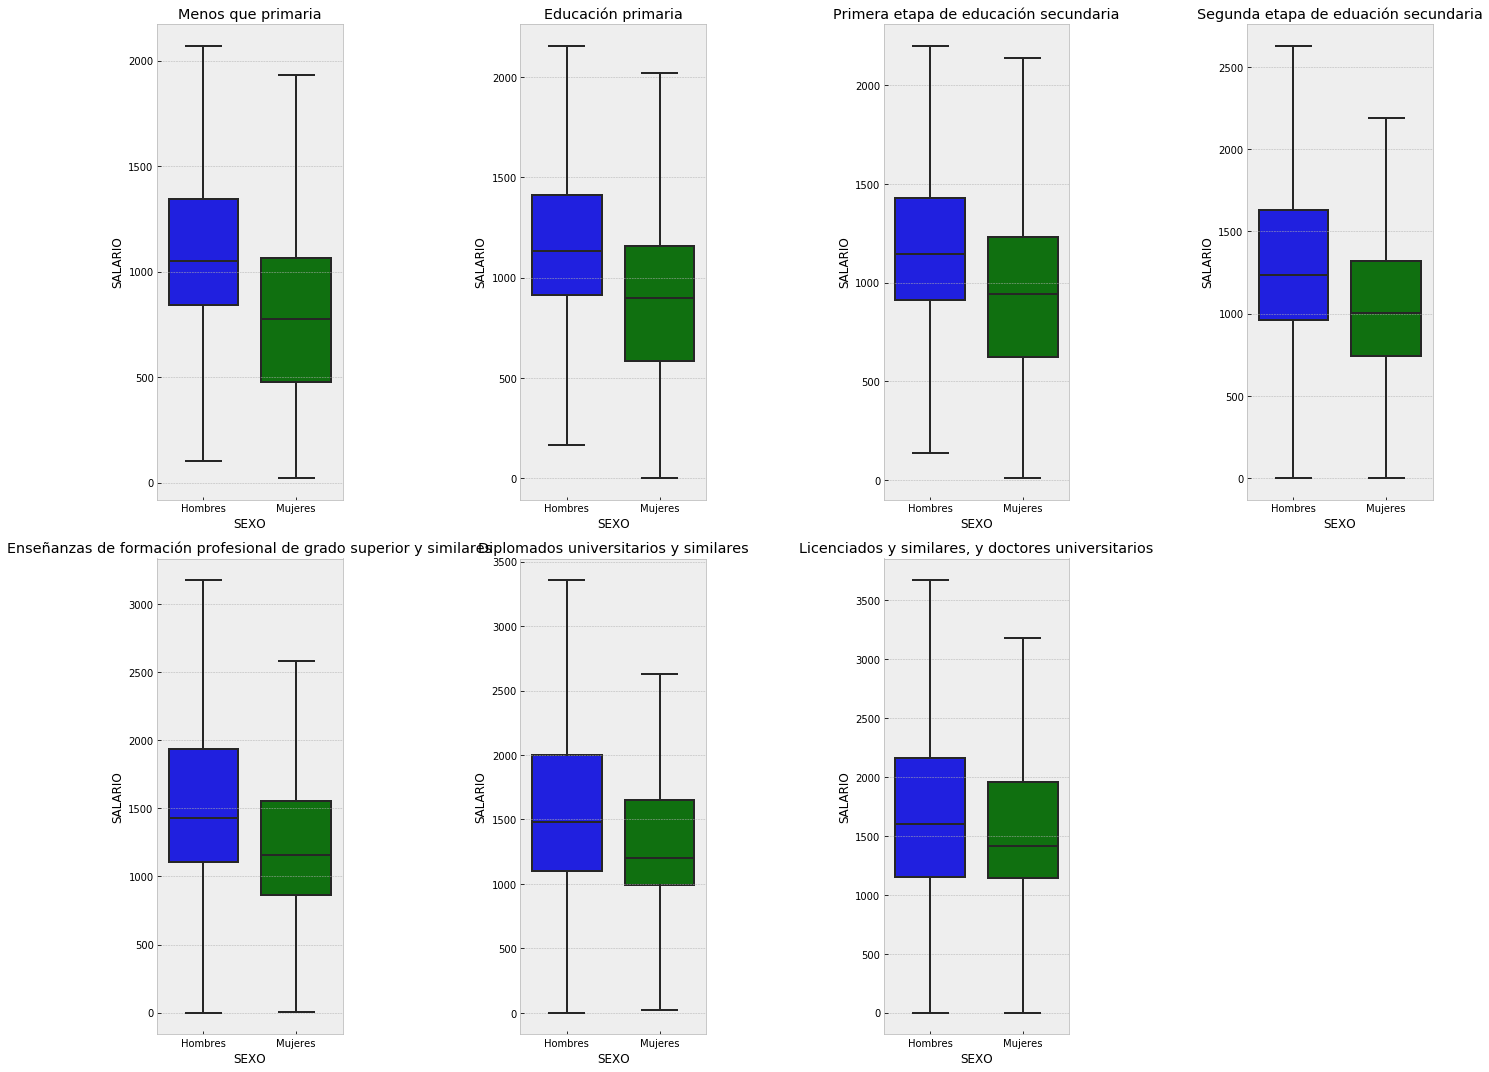

In [69]:
f, axes = plt.subplots(2, 4, figsize=(20,15), sharex=False)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i+1]
    if (len(df_category)>0):
        my_pal = {1: "blue", 6: "green"}
        
        a = sns.boxplot(x='SEXO', y="SALARIO",  data=df_category, ax=ax, 
                         palette=my_pal, showfliers = False, width=0.75)

        ax.set(xticklabels=['Hombres', 'Mujeres'])
        ax.set_title(estudios[i+1])
        
    else:
        ax.axis('off')


f.tight_layout();

    


# Comprobamos sueldos por industrias

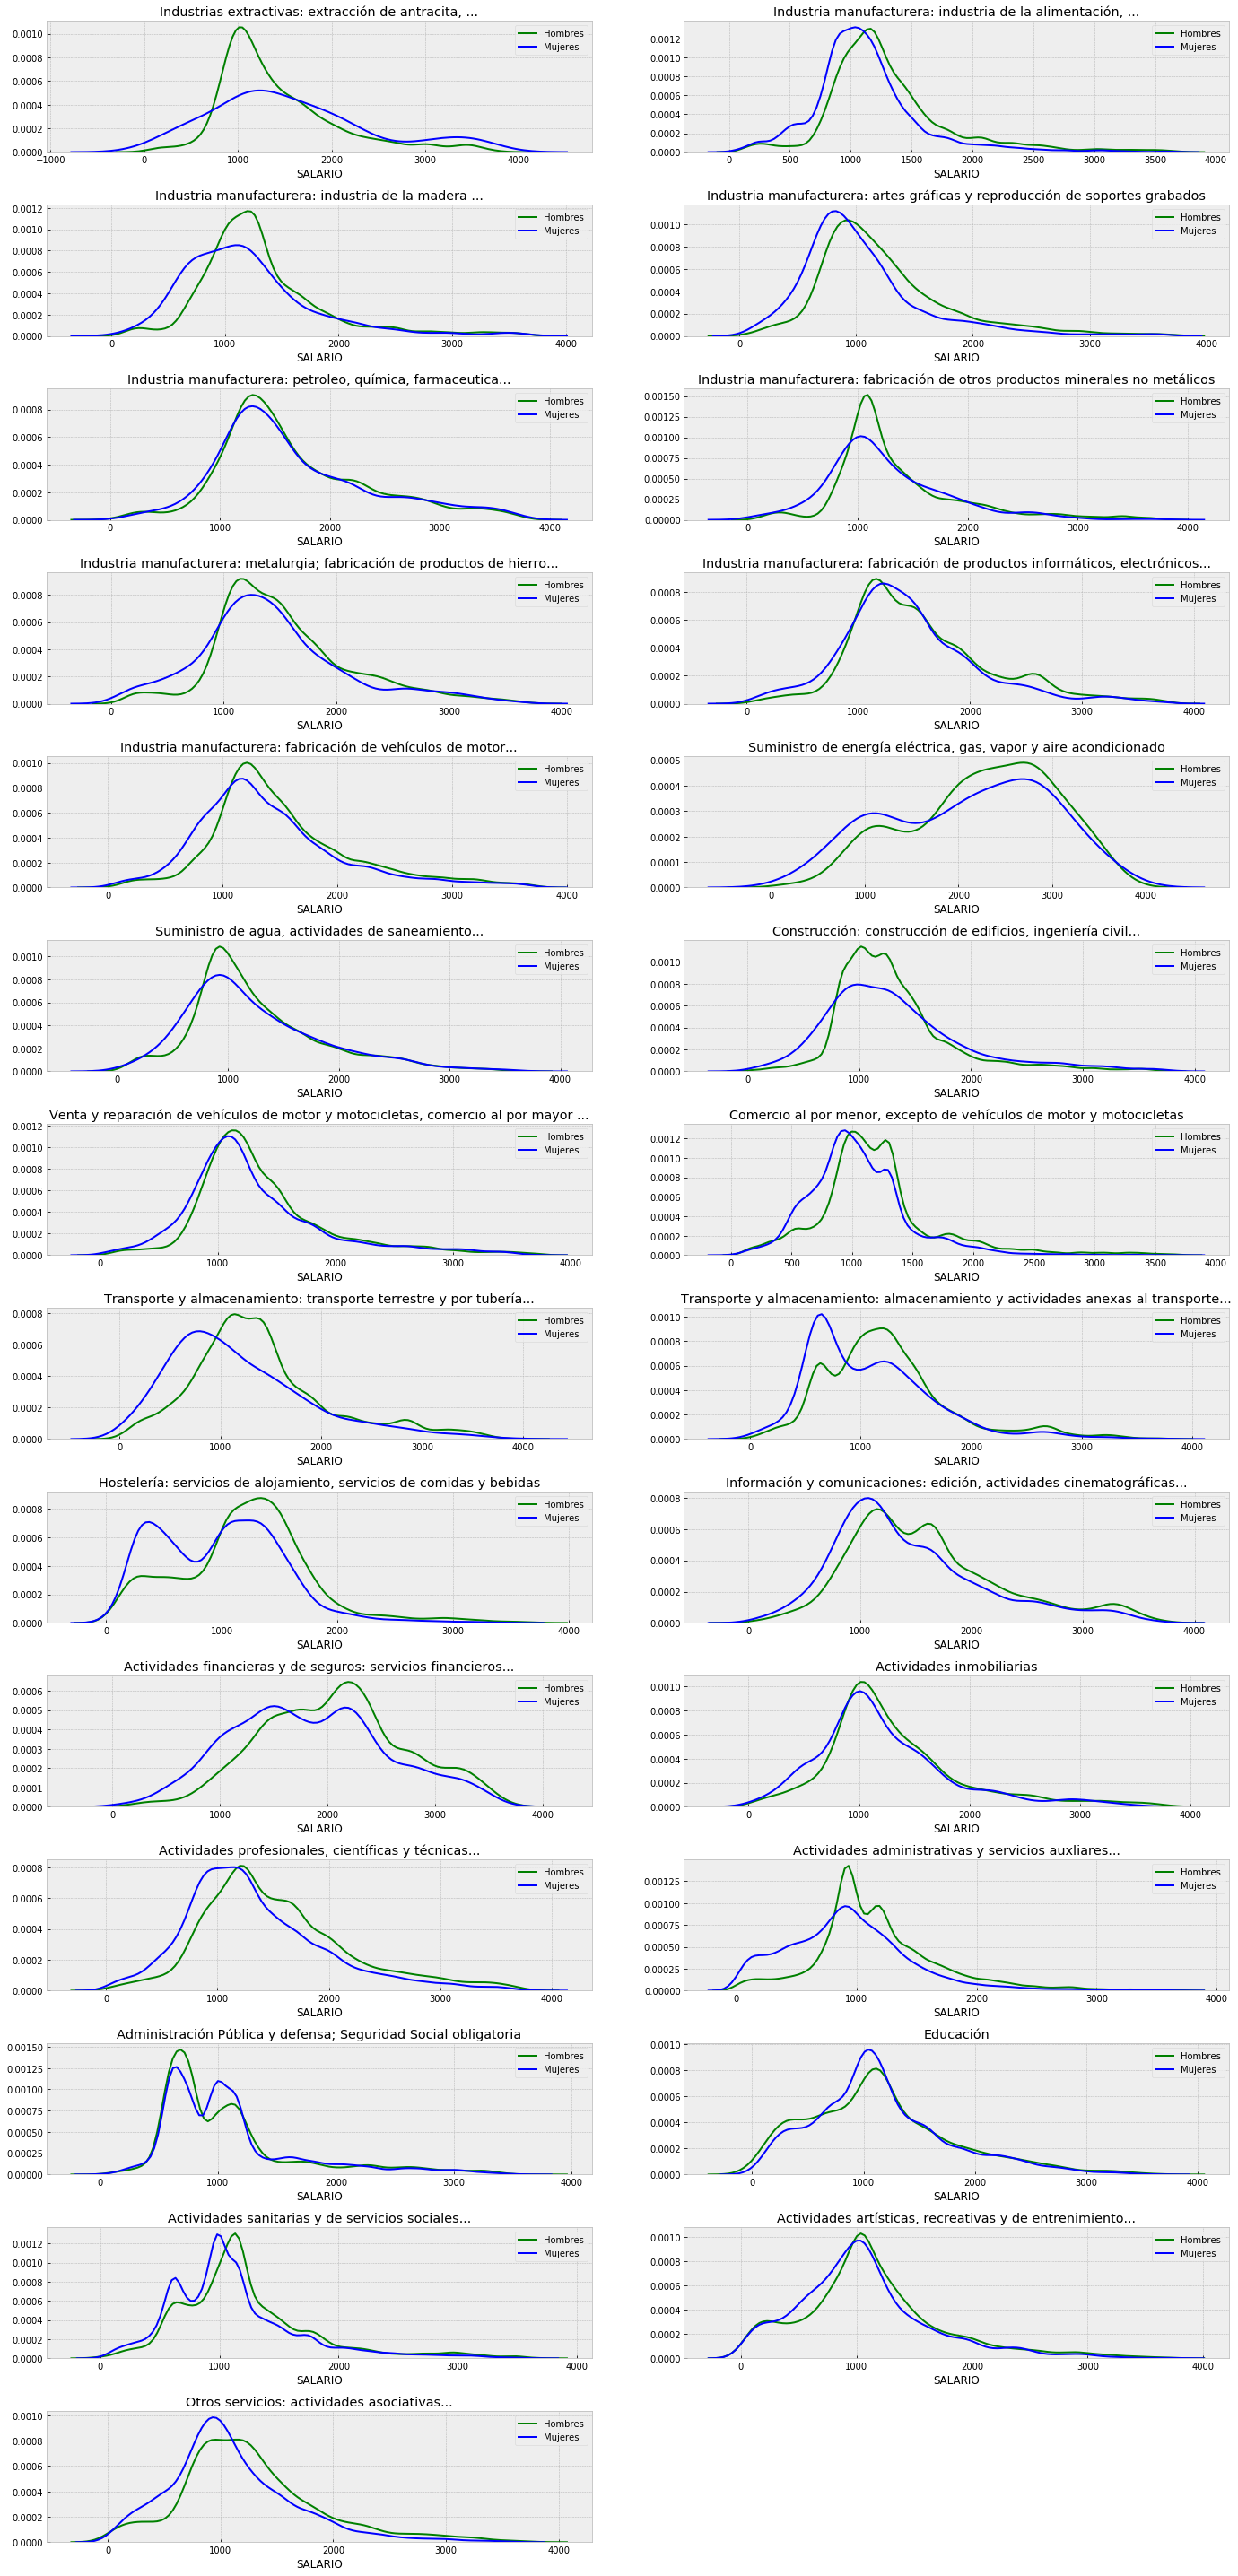

In [70]:

industrias = {0:'Industrias extractivas: extracción de antracita, ...',
1:'Industria manufacturera: industria de la alimentación, ...',
2:'Industria manufacturera: industria de la madera ...',
3:'Industria manufacturera: artes gráficas y reproducción de soportes grabados',
4:'Industria manufacturera: petroleo, química, farmaceutica...',
5:'Industria manufacturera: fabricación de otros productos minerales no metálicos',
6:'Industria manufacturera: metalurgia; fabricación de productos de hierro...',
7:'Industria manufacturera: fabricación de productos informáticos, electrónicos...',
8:'Industria manufacturera: fabricación de vehículos de motor...',
9:'Suministro de energía eléctrica, gas, vapor y aire acondicionado', 
10:'Suministro de agua, actividades de saneamiento...',
11:'Construcción: construcción de edificios, ingeniería civil...',
12:'Venta y reparación de vehículos de motor y motocicletas, comercio al por mayor ...',
13:'Comercio al por menor, excepto de vehículos de motor y motocicletas',
14:'Transporte y almacenamiento: transporte terrestre y por tubería...',
15:'Transporte y almacenamiento: almacenamiento y actividades anexas al transporte...',
16:'Hostelería: servicios de alojamiento, servicios de comidas y bebidas',
17:'Información y comunicaciones: edición, actividades cinematográficas...',
18:'Actividades financieras y de seguros: servicios financieros...',
19:'Actividades inmobiliarias',
20:'Actividades profesionales, científicas y técnicas...',
21:'Actividades administrativas y servicios auxliares...',
22:'Administración Pública y defensa; Seguridad Social obligatoria',
23:'Educación',
24:'Actividades sanitarias y de servicios sociales...',
25:'Actividades artísticas, recreativas y de entrenimiento...',
26:'Otros servicios: actividades asociativas...'}


columnToSearch = 'CNACE'

f, axes = plt.subplots(14, 2, figsize=(20, 40), sharex=False)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i]
    if (len(df_category)>0):
        hombres = df_category[df_category['SEXO'] == 1]
        mujeres = df_category[df_category['SEXO'] == 6]
        sns.distplot(hombres[columnToStudy], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=False, label = 'Hombres', ax = ax);
        sns.distplot(mujeres[columnToStudy], color='b', bins=100, hist_kws={'alpha': 0.4}, hist=False,  label = 'Mujeres', ax = ax);
        ax.set_title(industrias[i])
        
        
    else:
        ax.axis('off')

f.tight_layout()


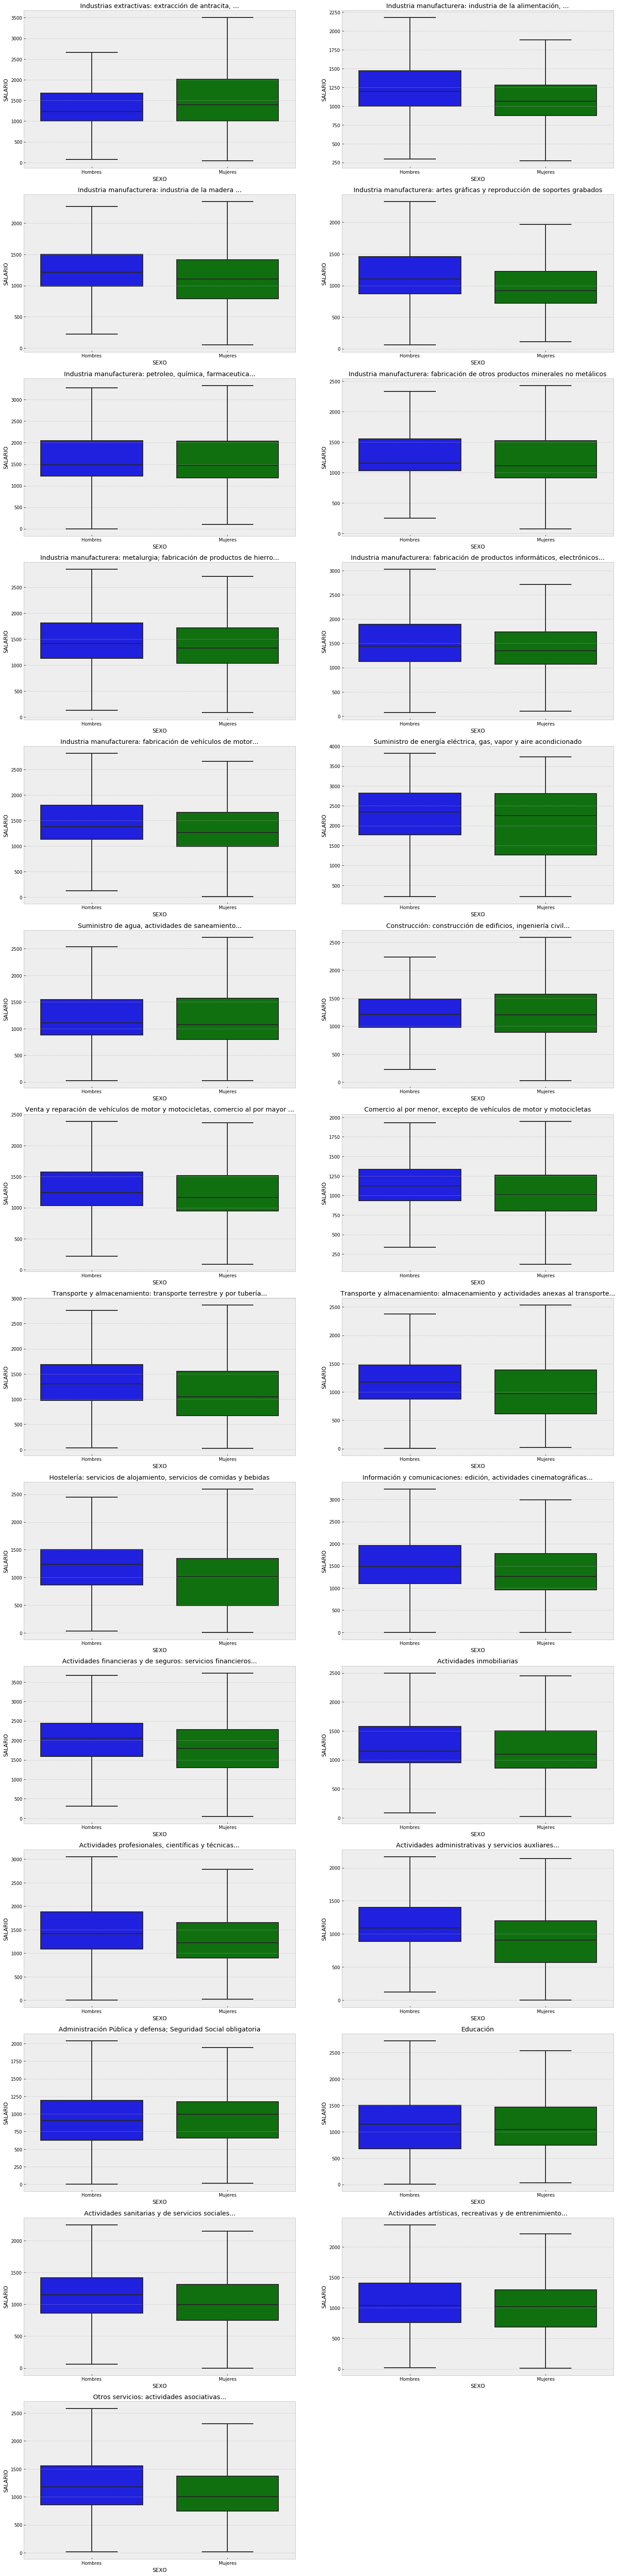

In [71]:
f, axes = plt.subplots(14, 2, figsize=(20,80), sharex=False)

for i, ax in enumerate(axes.flatten()):
    df_category = dfWithPrediccion[dfWithPrediccion[columnToSearch] == i]
    if (len(df_category)>0):
        my_pal = {1: "blue", 6: "green"}
        
        a = sns.boxplot(x='SEXO', y="SALARIO",  data=df_category, ax=ax, 
                         palette=my_pal, showfliers = False, width=0.75)

        ax.set(xticklabels=['Hombres', 'Mujeres'])
        ax.set_title(industrias[i])
        
    else:
        ax.axis('off')


f.tight_layout();


    


# Comprobamos hasta que punto cambia una predicción dependiendo del sexo

In [72]:
# vamos a comparar los sueldos originales con los predichos

muestra_inicial = dfSueldos.sample(n=100, random_state = 1)

test_sesgo_genero = muestra_inicial

#Cambiamos los valores de masculino a femenino y de femenino a masculino para realizar una nueva predicción
test_sesgo_genero['SEXO'] = test_sesgo_genero['SEXO'].map({1: 6, 6: 1})


#cambiamos las columnas CNACE y CNO1 a categorical
test_sesgo_genero['CNACE'] = test_sesgo_genero['CNACE'].astype('category')
test_sesgo_genero['CNO1'] = test_sesgo_genero['CNO1'].astype('category')

CNACE = test_sesgo_genero['CNACE'].astype('category')
CNO1 = test_sesgo_genero['CNO1'].astype('category')

test_sesgo_genero["CNACE"] = test_sesgo_genero["CNACE"].cat.codes
test_sesgo_genero["CNO1"] = test_sesgo_genero["CNO1"].cat.codes


In [73]:

# Labels are the values we want to predict
labels = np.array(test_sesgo_genero[columnToStudy])

#Quitamos las columnas que tienen un significado parecido al de nuestro estudio 
columns = ['SALARIO','PRECIOHORA','SALBASE','Prediccion']
test_sesgo_genero = test_sesgo_genero.drop(columns, axis = 1)



In [74]:

#features =  pd.get_dummies(features)
# Saving feature names for later use
feature_list = list(test_sesgo_genero.columns)
# Convert to numpy array
test_sesgo_genero = np.array(test_sesgo_genero)

In [75]:
prediccion =  rf.predict(test_sesgo_genero)

In [76]:
muestra_inicial['Prediccion2'] = prediccion
muestra_inicial['Diferencia'] = round(muestra_inicial['Prediccion2'] - muestra_inicial['Prediccion'],2)

In [77]:
#mostramos los resultados

df = muestra_inicial[['SALARIO', 'SEXO', 'Prediccion', 'Prediccion2', 'Diferencia']]
df['SEXO'] = df['SEXO'].map({1: 'Hombre', 6: 'Mujer'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
print(df[df['SEXO']=='Mujer'].sort_values(by = 'Diferencia', ascending = True) )

        SALARIO   SEXO  Prediccion  Prediccion2  Diferencia
86707   1835.55  Mujer  1890.67325   1301.84845     -588.82
202899  2680.35  Mujer  2559.18360   2007.32175     -551.86
171692  3508.33  Mujer  3046.88480   2698.75620     -348.13
82613   1239.16  Mujer  3144.29310   2877.78790     -266.51
117825  1085.93  Mujer  1340.70525   1087.31580     -253.39
1946    2385.63  Mujer  2115.84080   1877.29690     -238.54
204360  1392.94  Mujer  1291.79755   1076.76080     -215.04
85295   3411.65  Mujer  3124.61515   2924.91660     -199.70
3467    1231.20  Mujer  1363.49715   1232.43070     -131.07
205499  1926.93  Mujer  1802.99170   1671.93655     -131.06
132541  1830.19  Mujer  1909.47235   1790.94040     -118.53
122810  1408.74  Mujer  1440.44900   1339.64205     -100.81
174614  1684.05  Mujer  1365.16910   1284.42510      -80.74
6652    1648.65  Mujer  1585.85310   1507.26785      -78.59
174175  1211.29  Mujer  1234.31200   1155.90095      -78.41
151118  1378.55  Mujer  1286.09820   121